# PROJET 7


Ce notebook est simplement l'entrainement de notre modèle final, qui à été trouvé (optimisation des hyperparamètre avec optuna)
sur le notebook P7_MB_EDA_modélisation

Dans ce notebook on retrouve l'entrainement, le test avec la base de données d'évaluation de Kaggle, la sauvegarde d'échantillons de la base de données et l'explainer de shap

In [116]:
import lightgbm
import pandas as pd
import sklearn
sklearn.__version__,lightgbm.__version__

('1.0.2', '3.3.2')

In [56]:
t={"jac":3,"k":np.nan}

In [57]:
l=pd.DataFrame(t,index=['ihu'])

In [58]:
l

,jac,k
ihu,3,NaN


In [61]:
l.replace({np.nan:None})

,jac,k
ihu,3,None


In [354]:
d=pd.read_csv('data_to_api.csv')

In [355]:
d.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MIN,CC_CNT_INSTALMENT_MATURE_CUM_MAX,CC_CNT_INSTALMENT_MATURE_CUM_VAR,CC_NAME_CONTRACT_STATUS_Completed_VAR
0,0.0,Cash loans,M,N,Y,0,112500.0,343800.0,12478.5,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,Cash loans,F,N,Y,1,90000.0,755190.0,36459.0,Unaccompanied,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0
2,0.0,Cash loans,F,N,Y,0,202500.0,900000.0,38263.5,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,Cash loans,M,Y,Y,1,495000.0,1165270.5,41854.5,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,Cash loans,F,N,N,2,67500.0,1054773.0,38016.0,"Spouse, partner",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
l=pd.read_csv('d_sample_to_api.csv')

In [357]:
l.head()

,TARGET,REFUSED_APP_CREDIT_PERC_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,NAME_INCOME_TYPE,PREV_AMT_DOWN_PAYMENT_MIN,BURO_AMT_ANNUITY_MAX,CLOSED_DAYS_CREDIT_VAR,REGION_RATING_CLIENT_W_CITY,PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN,INSTAL_DBD_SUM,...,CC_AMT_PAYMENT_CURRENT_SUM,PREV_PRODUCT_COMBINATION_POS_industry_with_interest_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_MEAN,INSTAL_DPD_MAX,CC_AMT_BALANCE_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,INSTAL_PAYMENT_DIFF_MAX,PREV_DAYS_DECISION_MIN
0,0.0,0.895927,0.0000,Commercial associate,2560.5,NaN,791448.000000,3,0.0,335.0,...,1219019.31,0.0,9.235642e+08,-1886.000000,3.0,60952.886757,3.0,5.0,0.00,-1498.0
1,0.0,1.000000,0.0000,Commercial associate,0.0,NaN,254713.200000,2,0.0,334.0,...,5868252.00,0.0,0.000000e+00,-1154.200000,0.0,343386.257143,2.0,0.0,0.00,-2884.0
2,0.0,0.933464,29250.0000,Working,0.0,NaN,82502.333333,3,0.0,1046.0,...,68175.00,0.0,4.556250e+09,-1165.333333,4.0,340959.456000,3.0,1.0,1076.76,-1540.0
3,0.0,0.769231,4848.9975,Working,7222.5,NaN,22504.333333,2,0.0,89.0,...,117090.00,0.0,3.143812e+09,-624.666667,2.0,234358.277727,3.0,20.0,0.00,-823.0
4,0.0,NaN,NaN,Working,0.0,13230.0,251662.400000,2,0.0,74.0,...,153900.00,0.0,4.815000e+08,-1809.000000,2.0,151479.050000,2.0,4.0,24293.88,-543.0


In [66]:
np.mean([len(k.split(' ')) for k in d.columns]),np.mean([len(k.split('+')) for k in d.columns]),np.mean([len(k.split('-')) for k in d.columns]),np.mean([len(k.split('(')) for k in d.columns]),np.mean([len(k.split(')')) for k in d.columns]),np.mean([len(k.split(':')) for k in d.columns]),np.mean([len(k.split(',')) for k in d.columns]),np.mean([len(k.split('.')) for k in d.columns]),np.mean([len(k.split(';')) for k in d.columns]),np.mean([len(k.split('/')) for k in d.columns])


    


(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

In [358]:
def get_types(string):
  if string=='object':
    return 'str'
  else:
    return string[:-2]
for k in l.columns: 
  print('   '+k+': '+get_types(str(l.dtypes[k])))

   TARGET: float
   REFUSED_APP_CREDIT_PERC_MIN: float
   ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN: float
   NAME_INCOME_TYPE: str
   PREV_AMT_DOWN_PAYMENT_MIN: float
   BURO_AMT_ANNUITY_MAX: float
   CLOSED_DAYS_CREDIT_VAR: float
   REGION_RATING_CLIENT_W_CITY: int
   PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN: float
   INSTAL_DBD_SUM: float
   OCCUPATION_TYPE: str
   PREV_NAME_CONTRACT_TYPE_Revolving_loans_MEAN: float
   PREV_NAME_CASH_LOAN_PURPOSE_XNA_MEAN: float
   CC_AMT_DRAWINGS_CURRENT_MAX: float
   PREV_NAME_SELLER_INDUSTRY_Industry_MEAN: float
   PREV_NAME_CONTRACT_STATUS_Unused_offer_MEAN: float
   ACTIVE_DAYS_CREDIT_UPDATE_MEAN: float
   APPROVED_AMT_DOWN_PAYMENT_MIN: float
   CLOSED_DAYS_CREDIT_UPDATE_MEAN: float
   PREV_DAYS_DECISION_MEAN: float
   PREV_PRODUCT_COMBINATION_Cash_Street__high_MEAN: float
   PREV_AMT_ANNUITY_MIN: float
   PREV_NAME_PAYMENT_TYPE_Cash_through_the_bank_MEAN: float
   REFUSED_AMT_APPLICATION_MAX: float
   CC_AMT_BALANCE_VAR: float
   APPROVED_AMT_DOWN_PAYMEN

In [62]:
def get_types(string):
  if string=='object':
    return 'str'
  else:
    return string[:-2]
for k in d.columns: 
  print('   '+k+': '+get_types(str(d.dtypes[k])))


   TARGET: float
   REFUSED_APP_CREDIT_PERC_MIN: float
   ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN: float
   NAME_INCOME_TYPE: str
   PREV_AMT_DOWN_PAYMENT_MIN: float
   BURO_AMT_ANNUITY_MAX: float
   CLOSED_DAYS_CREDIT_VAR: float
   REGION_RATING_CLIENT_W_CITY: int
   PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN: float
   INSTAL_DBD_SUM: float
   OCCUPATION_TYPE: str
   PREV_NAME_CONTRACT_TYPE_Revolving_loans_MEAN: float
   PREV_NAME_CASH_LOAN_PURPOSE_XNA_MEAN: float
   CC_AMT_DRAWINGS_CURRENT_MAX: float
   PREV_NAME_SELLER_INDUSTRY_Industry_MEAN: float
   PREV_NAME_CONTRACT_STATUS_Unused_offer_MEAN: float
   ACTIVE_DAYS_CREDIT_UPDATE_MEAN: float
   APPROVED_AMT_DOWN_PAYMENT_MIN: float
   CLOSED_DAYS_CREDIT_UPDATE_MEAN: float
   PREV_DAYS_DECISION_MEAN: float
   PREV_PRODUCT_COMBINATION_Cash_Street__high_MEAN: float
   PREV_AMT_ANNUITY_MIN: float
   PREV_NAME_PAYMENT_TYPE_Cash_through_the_bank_MEAN: float
   REFUSED_AMT_APPLICATION_MAX: float
   CC_AMT_BALANCE_VAR: float
   APPROVED_AMT_DOWN_PAYMEN

In [67]:
d.dtypes.value_counts()

float64    214
object      11
int64        9
dtype: int64

In [72]:
d.select_dtypes('int64')

,REGION_RATING_CLIENT_W_CITY,DAYS_BIRTH,FLAG_DOCUMENT_16,FLAG_DOCUMENT_6,DAYS_ID_PUBLISH,DAYS_EMPLOYED,FLAG_DOCUMENT_18,FLAG_DOCUMENT_3,REG_CITY_NOT_LIVE_CITY
0,2,-9461,0,0,-2120,-637,0,1,0
1,1,-16765,0,0,-291,-1188,0,1,0
2,2,-19046,0,0,-2531,-225,0,0,0
3,2,-19005,0,0,-2437,-3039,0,1,0
4,2,-19932,0,0,-3458,-3038,0,0,0
...,...,...,...,...,...,...,...,...,...
307495,1,-9327,0,0,-1982,-236,0,0,0
307496,2,-20775,0,0,-4090,365243,0,1,0
307497,3,-14966,0,0,-5150,-7921,0,1,0
307498,2,-11961,0,0,-931,-4786,0,1,1


In [110]:
np.round(d['TARGET'].isna().mean(),3)

0.0

TARGET
REFUSED_APP_CREDIT_PERC_MIN
ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN
PREV_AMT_DOWN_PAYMENT_MIN
BURO_AMT_ANNUITY_MAX
CLOSED_DAYS_CREDIT_VAR
PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN
INSTAL_DBD_SUM
PREV_NAME_CONTRACT_TYPE_Revolving_loans_MEAN
PREV_NAME_CASH_LOAN_PURPOSE_XNA_MEAN
CC_AMT_DRAWINGS_CURRENT_MAX
PREV_NAME_SELLER_INDUSTRY_Industry_MEAN
PREV_NAME_CONTRACT_STATUS_Unused_offer_MEAN
ACTIVE_DAYS_CREDIT_UPDATE_MEAN
APPROVED_AMT_DOWN_PAYMENT_MIN
CLOSED_DAYS_CREDIT_UPDATE_MEAN
PREV_DAYS_DECISION_MEAN
PREV_PRODUCT_COMBINATION_Cash_Street__high_MEAN
PREV_AMT_ANNUITY_MIN
PREV_NAME_PAYMENT_TYPE_Cash_through_the_bank_MEAN
REFUSED_AMT_APPLICATION_MAX
CC_AMT_BALANCE_VAR
APPROVED_AMT_DOWN_PAYMENT_MAX
PREV_PRODUCT_COMBINATION_POS_industry_without_interest_MEAN
PREV_NAME_GOODS_CATEGORY_Sport_and_Leisure_MEAN
ACTIVE_AMT_ANNUITY_MEAN
INSTAL_PAYMENT_DIFF_MEAN
PREV_NAME_CONTRACT_STATUS_Refused_MEAN
APPROVED_CNT_PAYMENT_SUM
PREV_CHANNEL_TYPE_Channel_of_corporate_sales_MEAN
CC_AMT_DRAWINGS_ATM_CURRENT_MEA

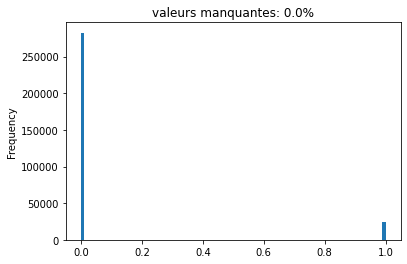

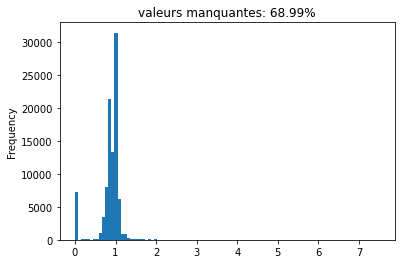

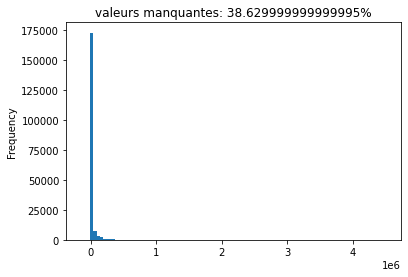

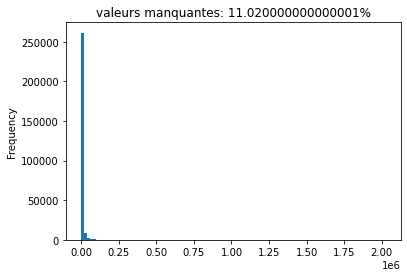

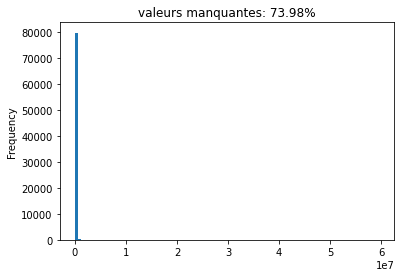

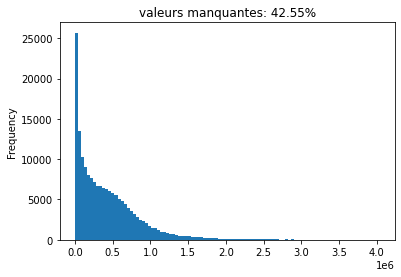

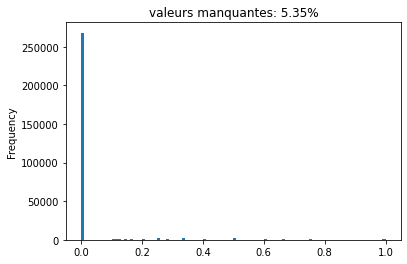

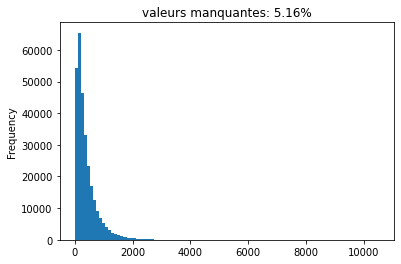

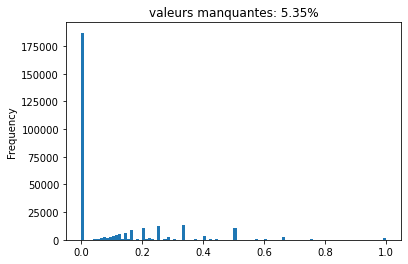

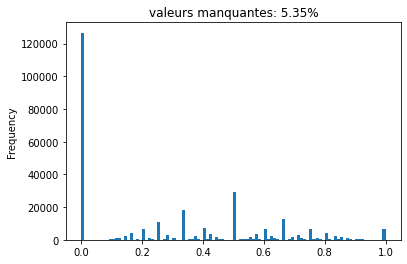

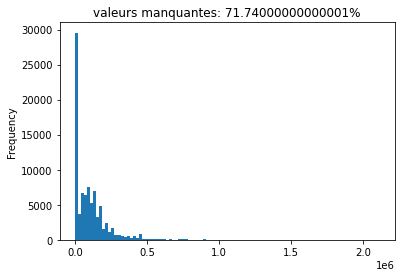

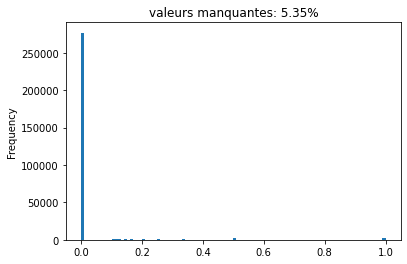

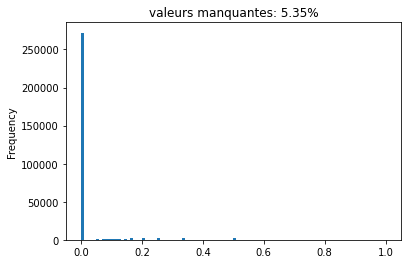

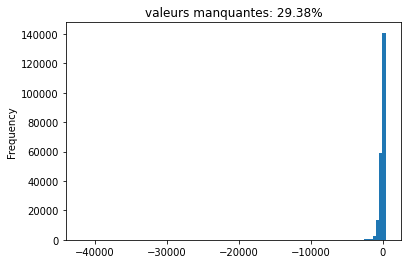

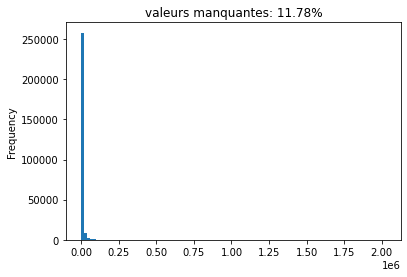

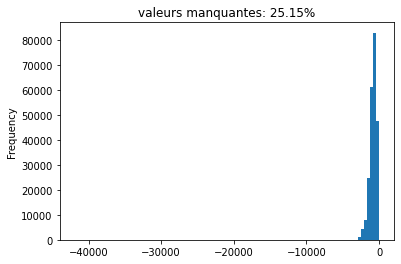

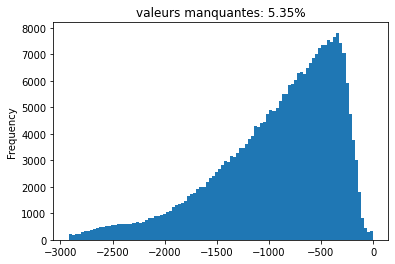

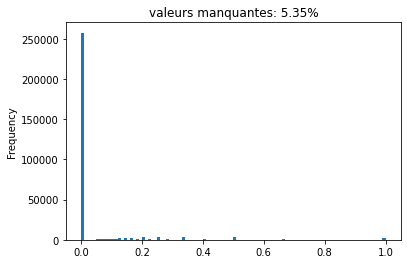

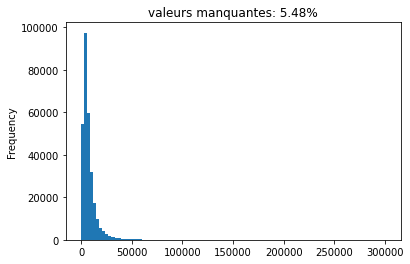

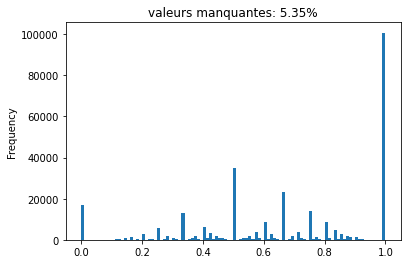

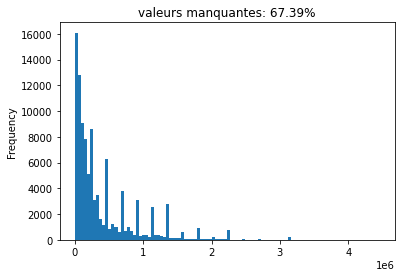

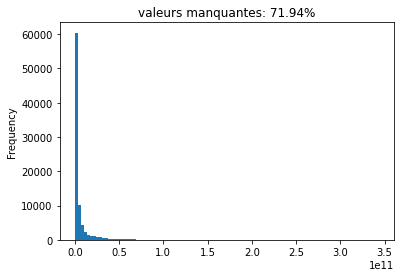

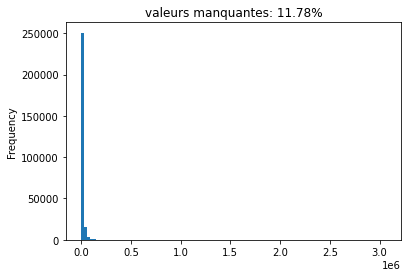

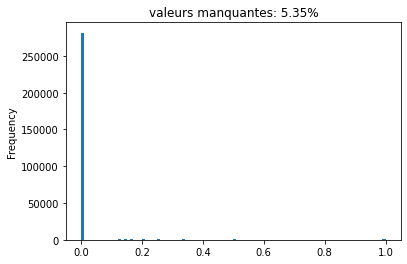

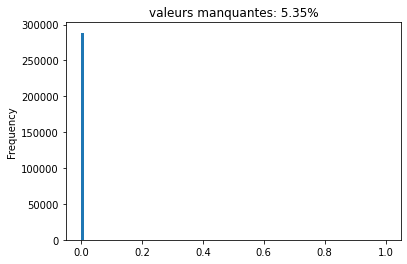

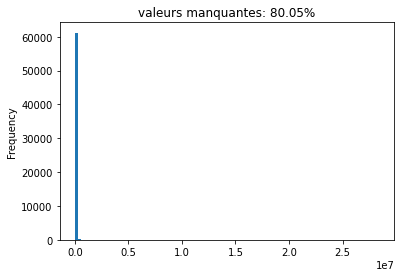

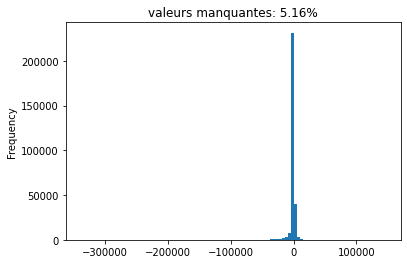

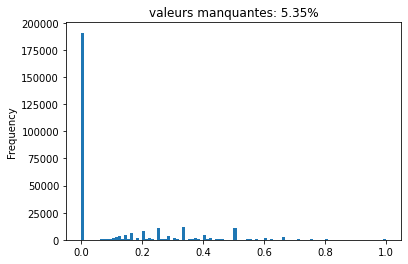

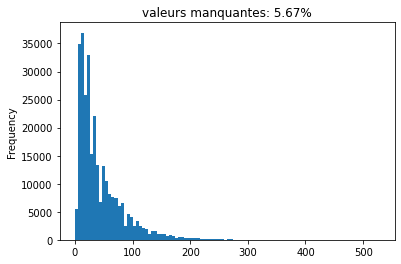

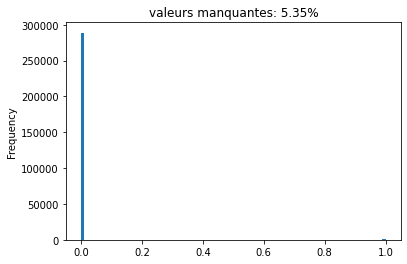

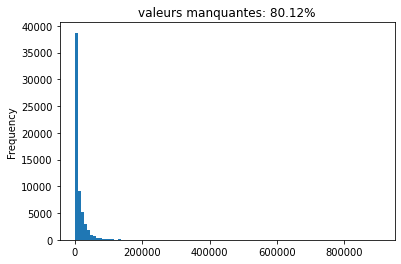

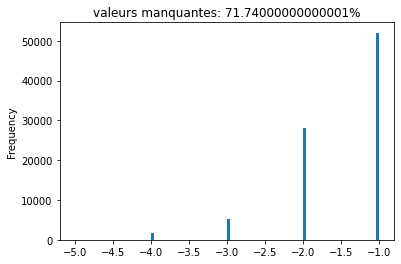

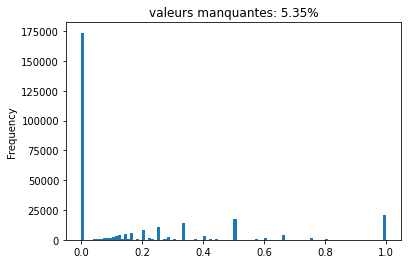

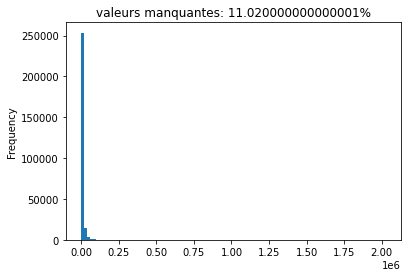

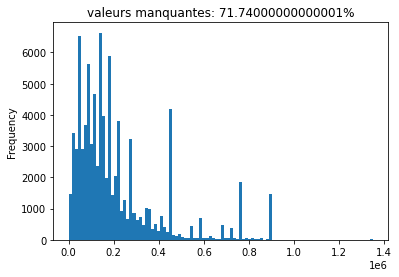

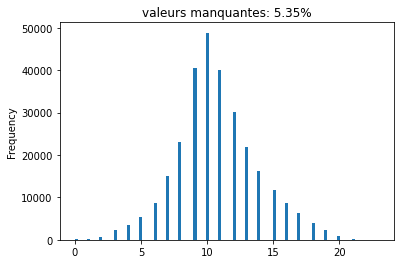

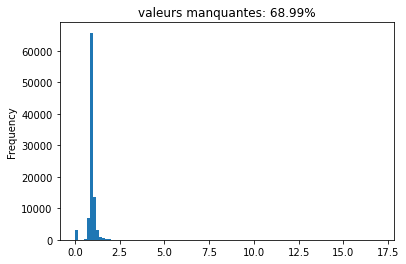

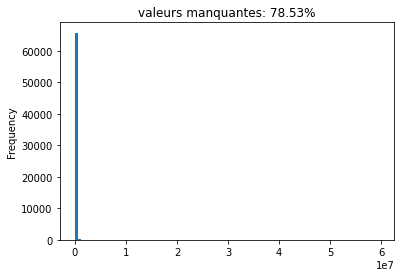

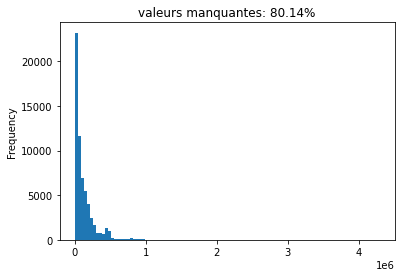

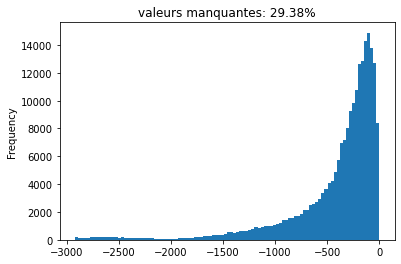

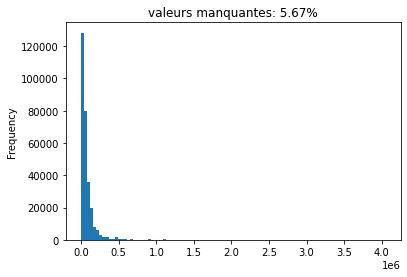

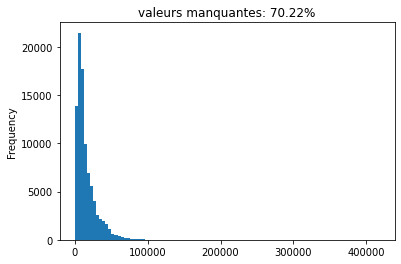

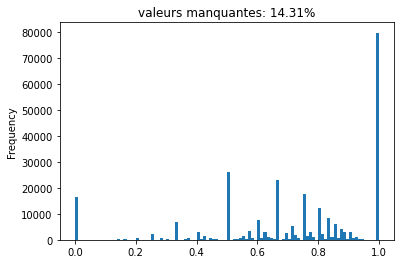

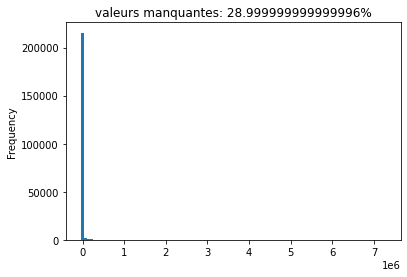

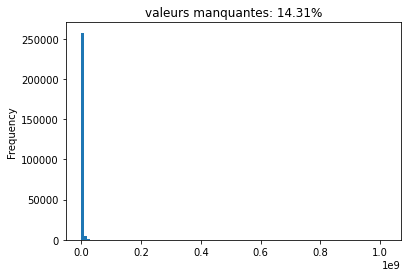

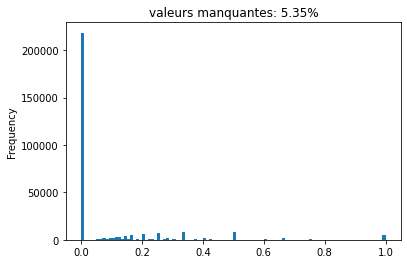

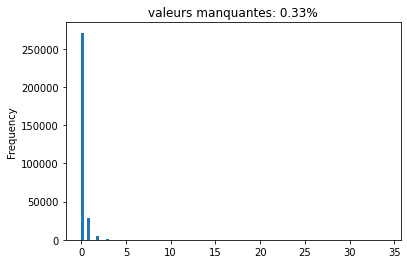

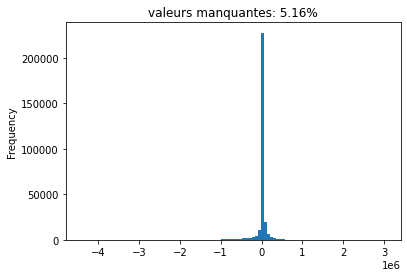

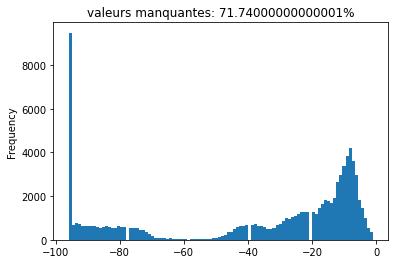

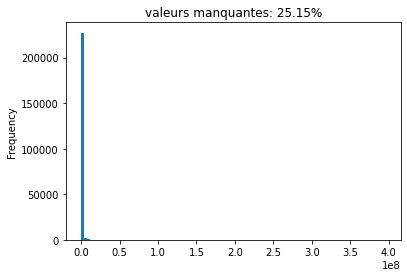

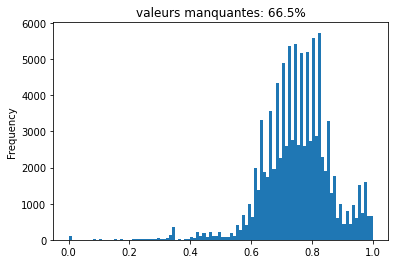

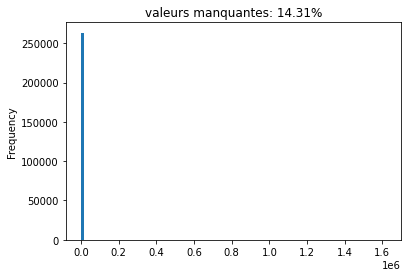

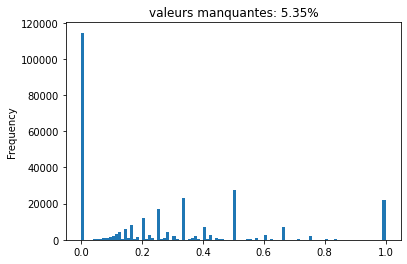

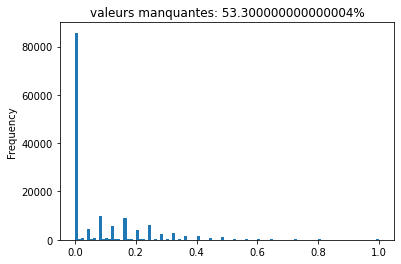

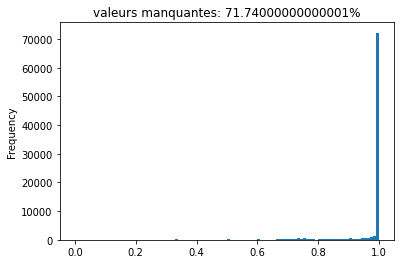

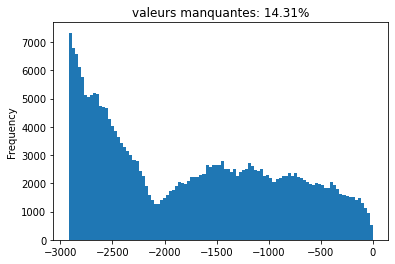

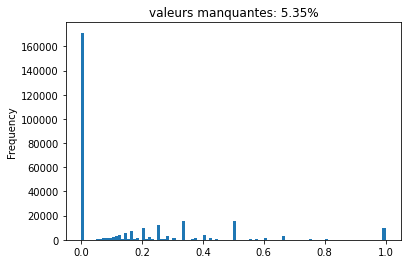

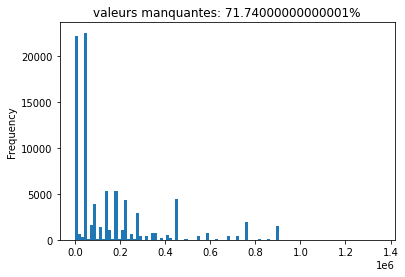

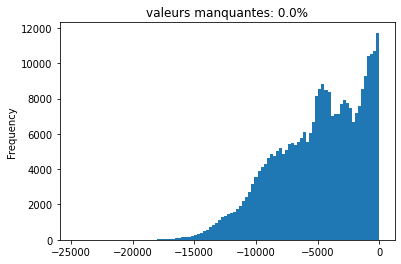

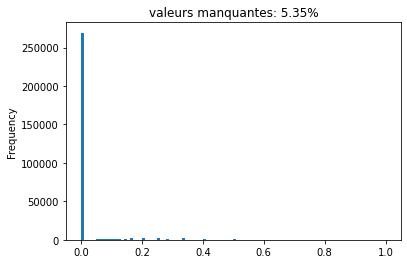

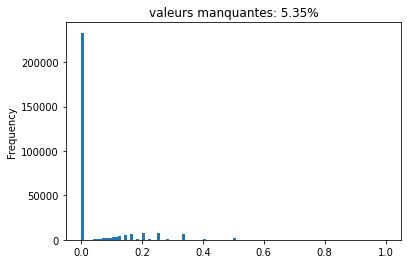

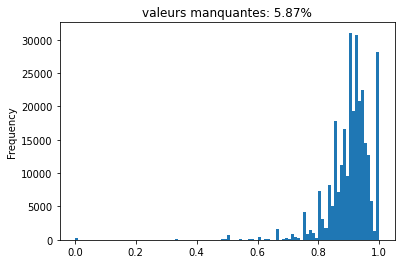

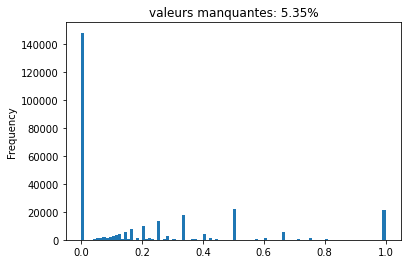

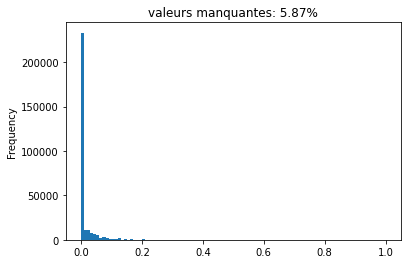

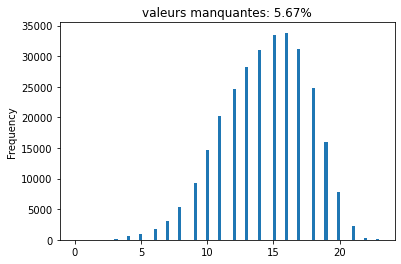

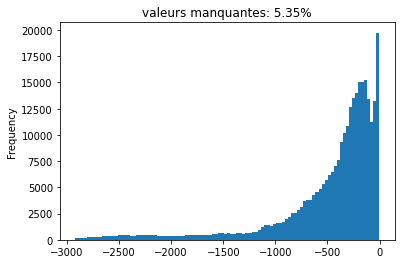

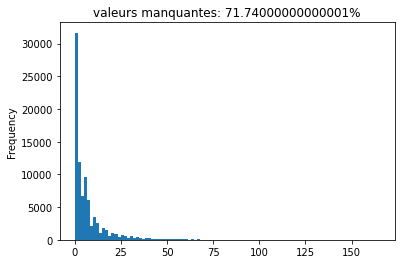

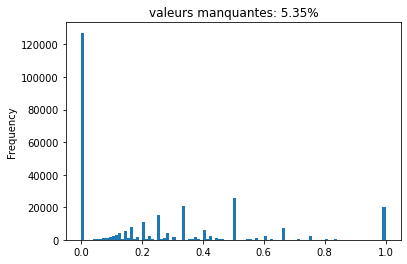

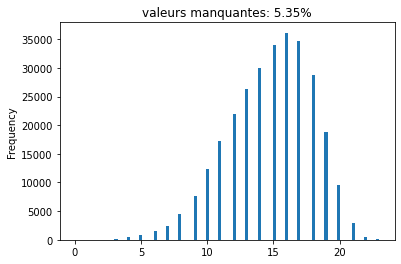

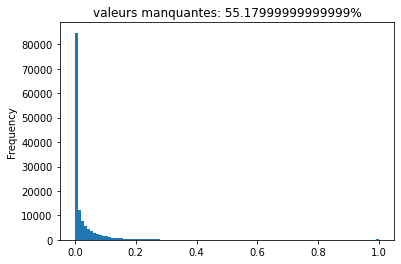

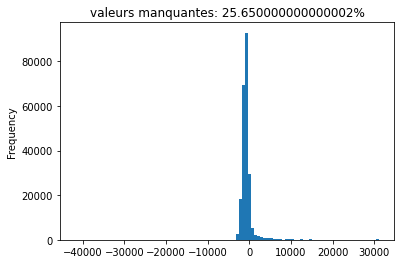

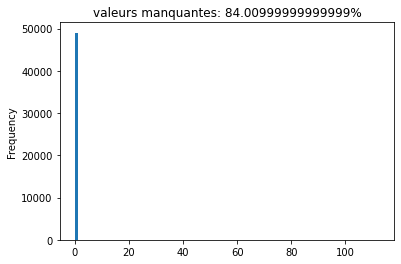

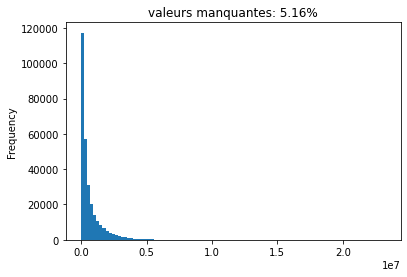

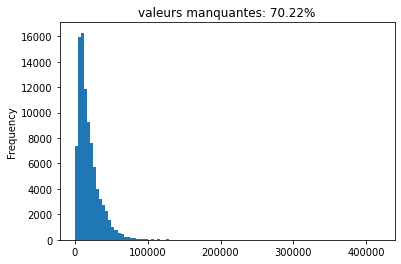

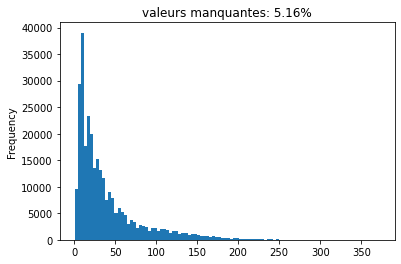

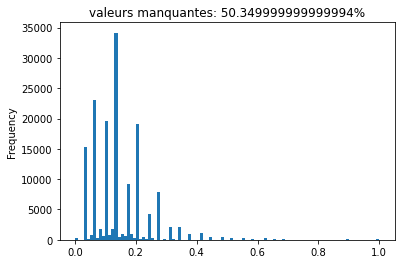

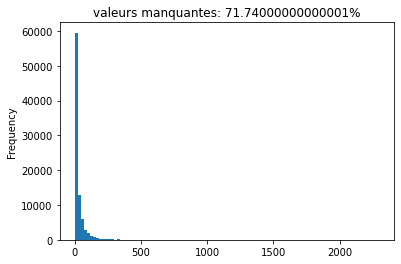

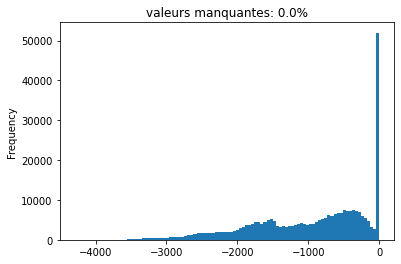

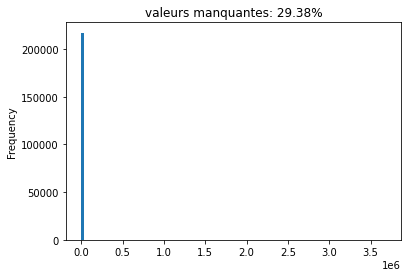

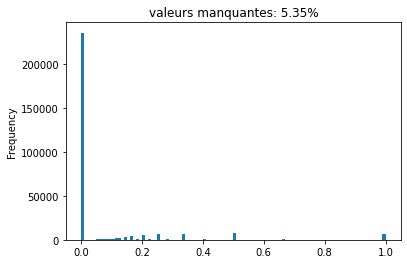

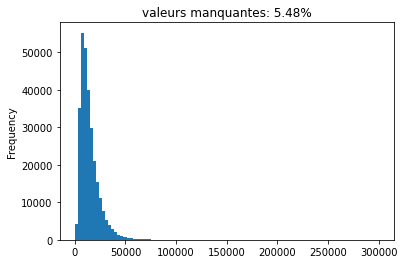

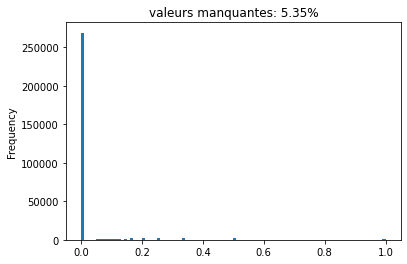

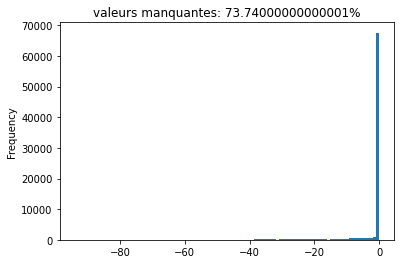

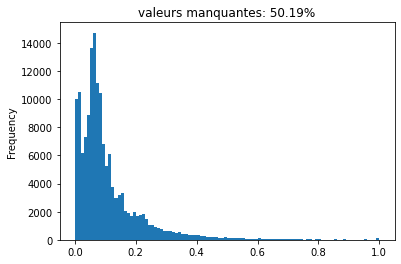

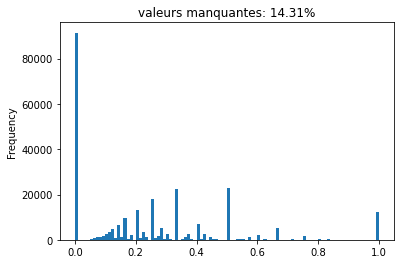

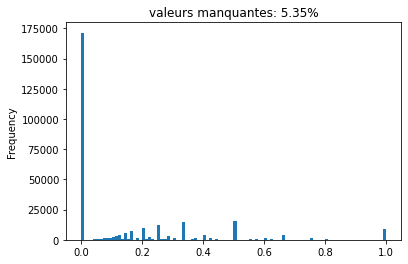

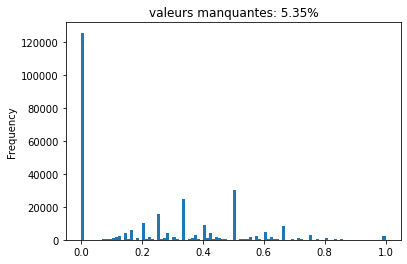

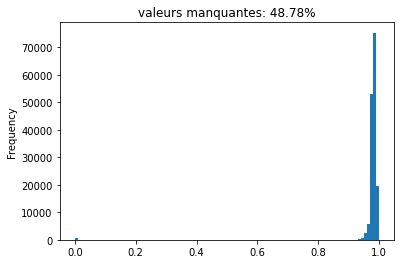

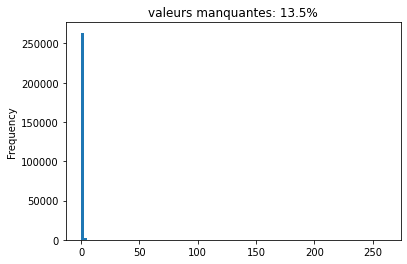

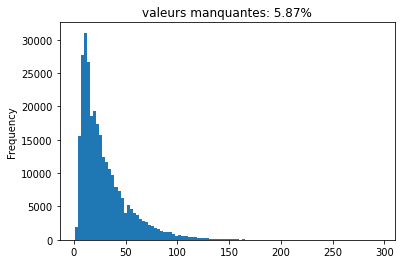

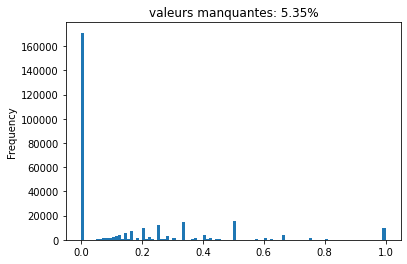

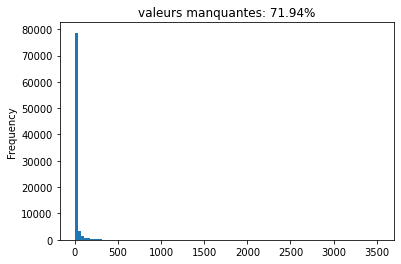

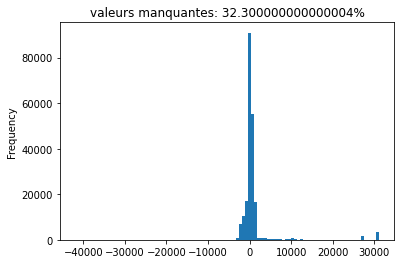

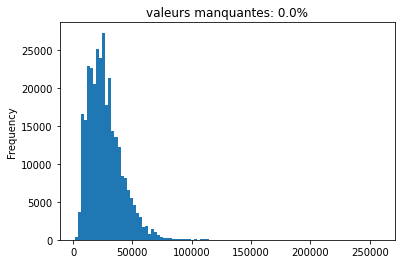

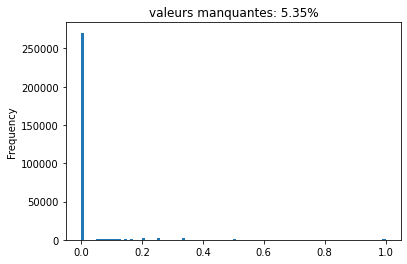

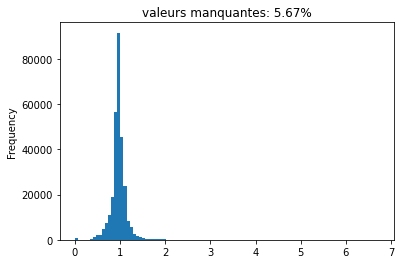

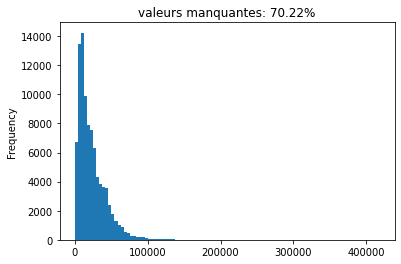

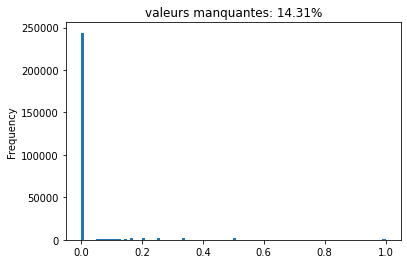

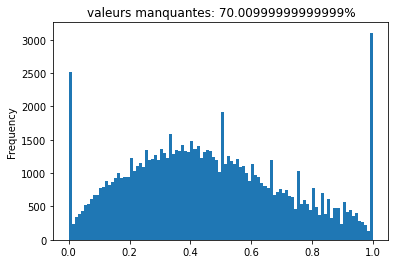

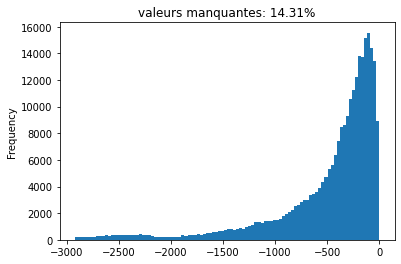

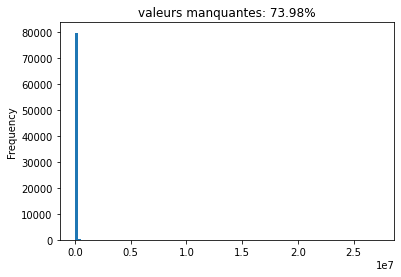

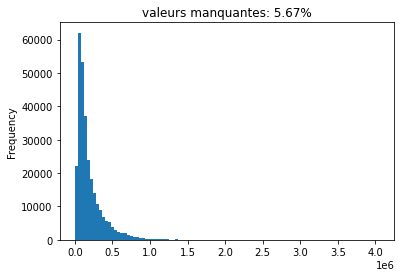

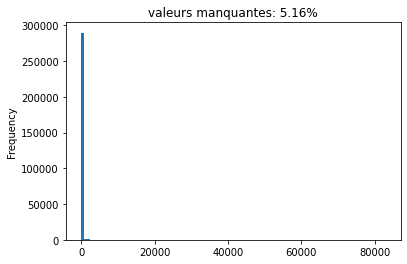

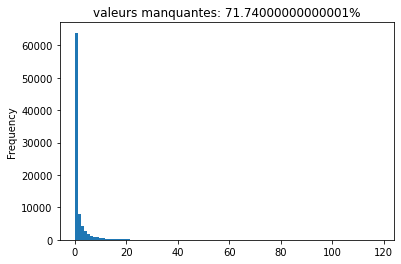

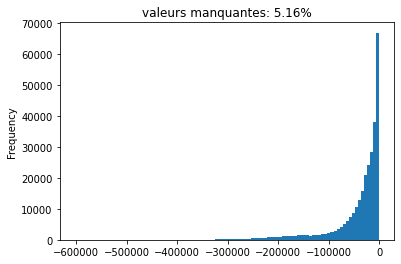

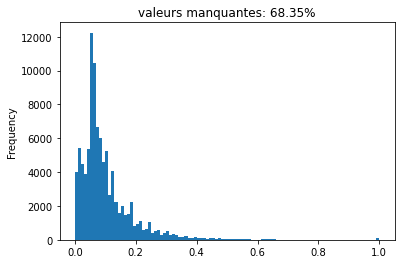

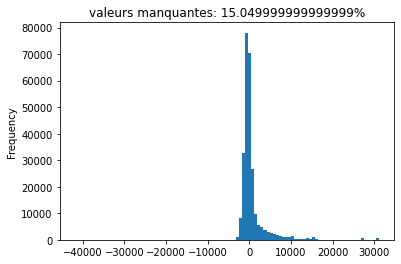

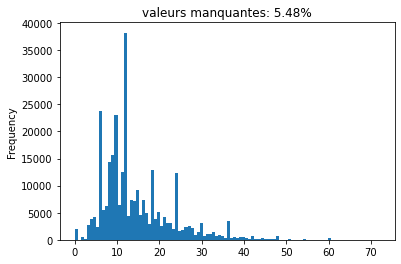

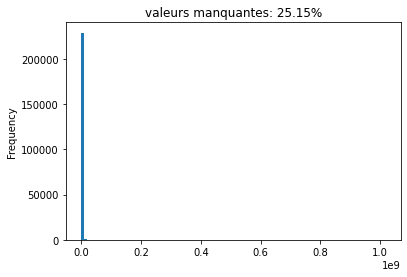

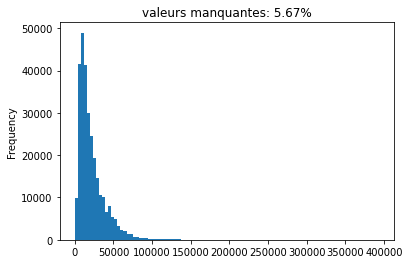

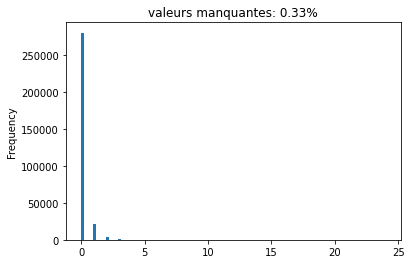

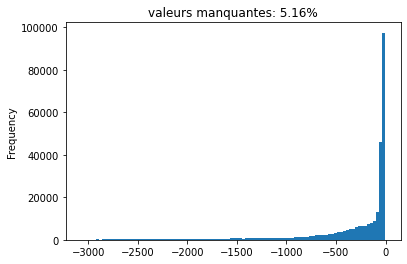

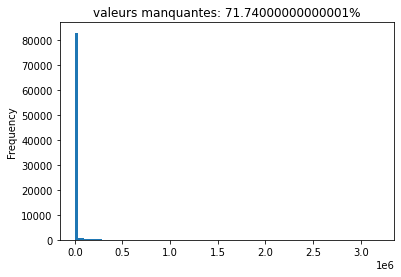

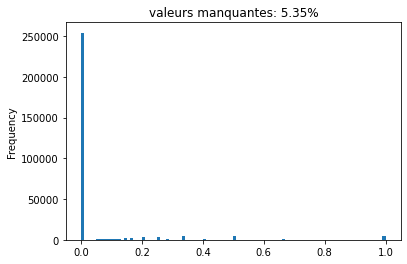

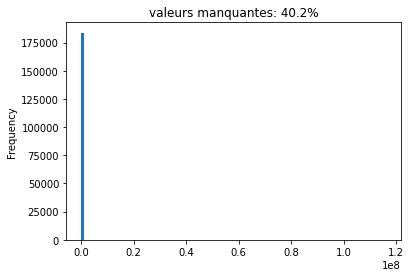

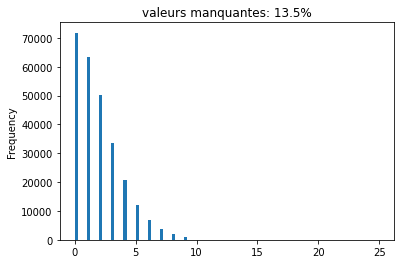

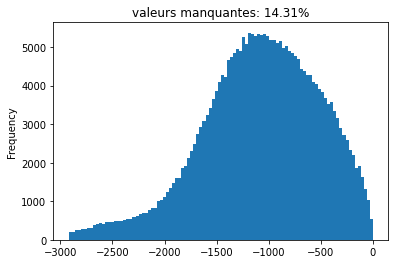

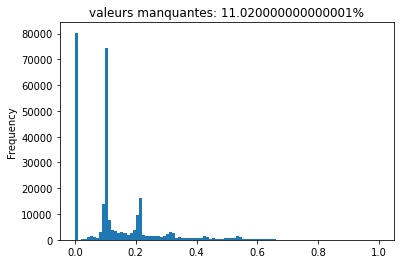

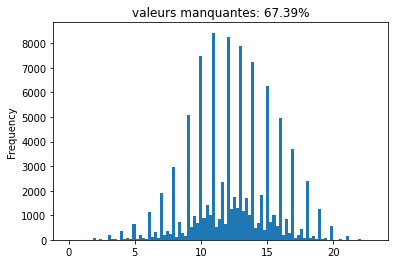

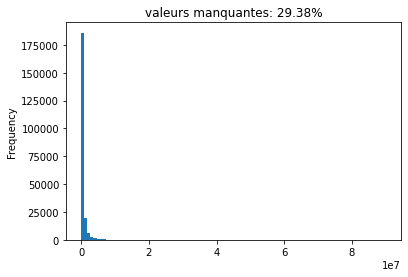

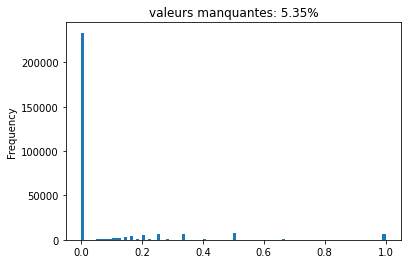

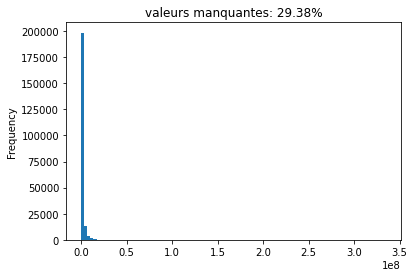

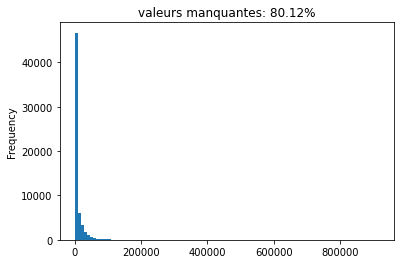

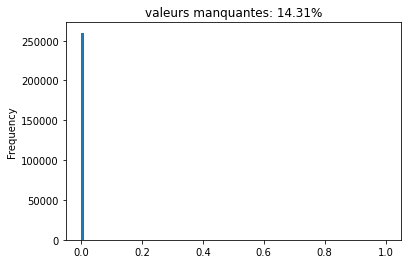

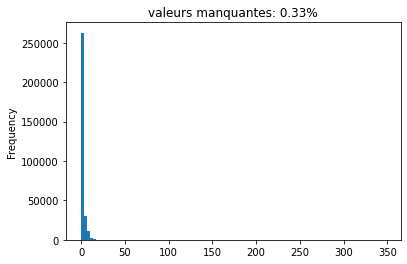

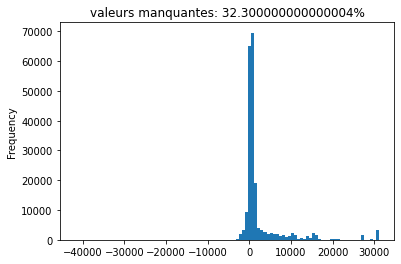

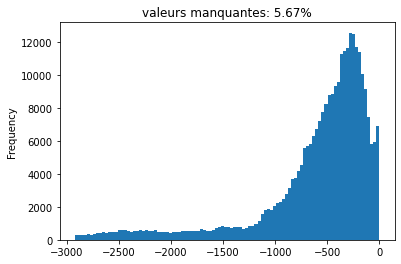

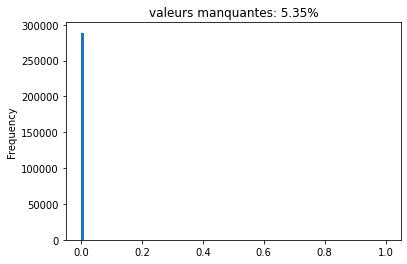

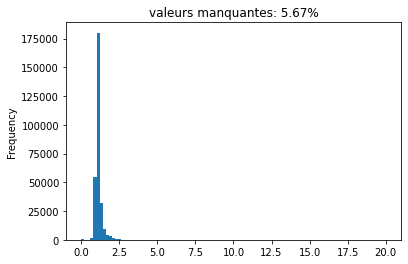

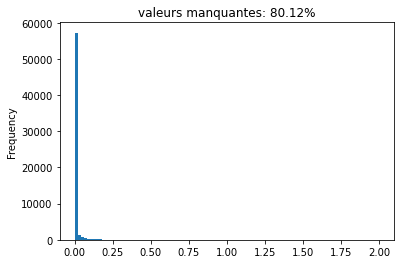

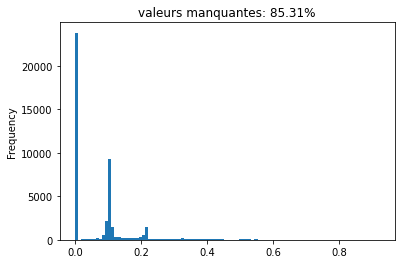

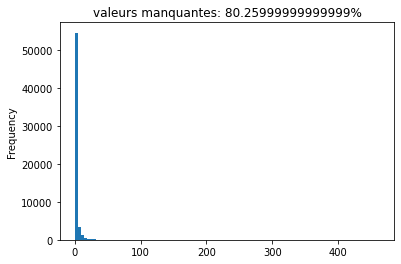

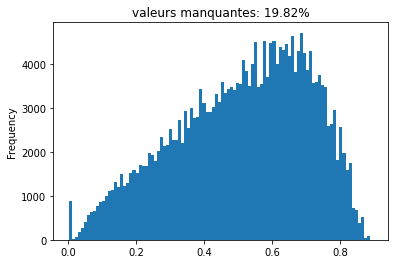

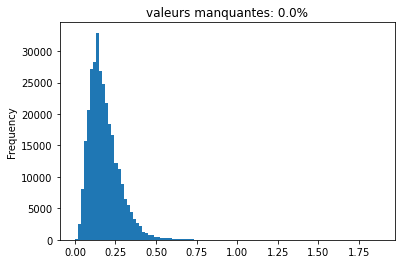

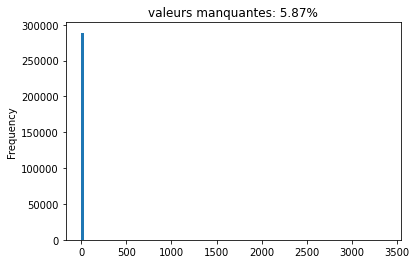

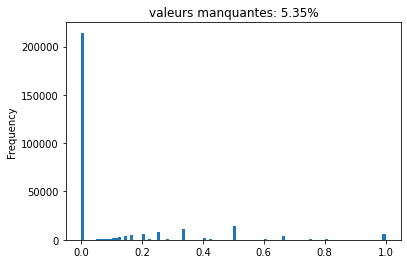

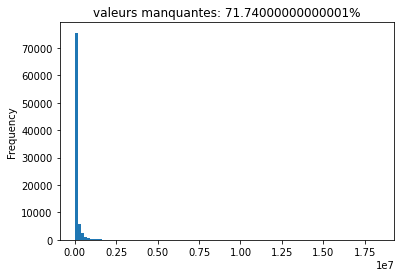

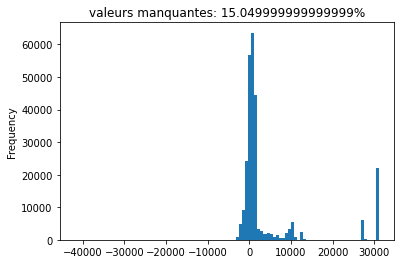

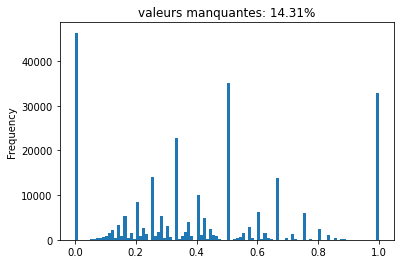

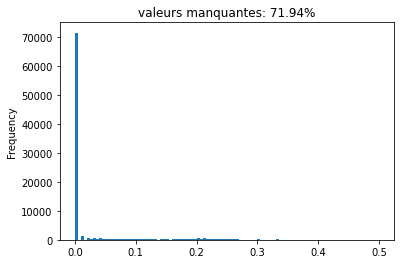

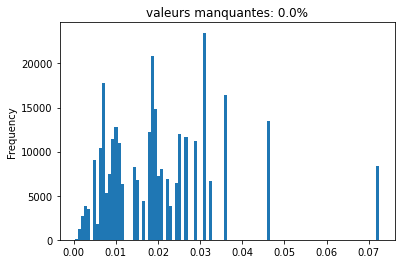

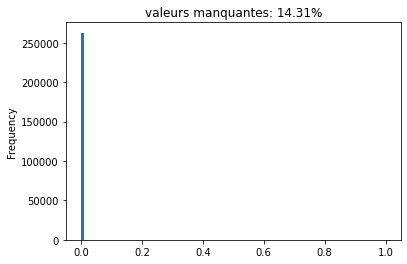

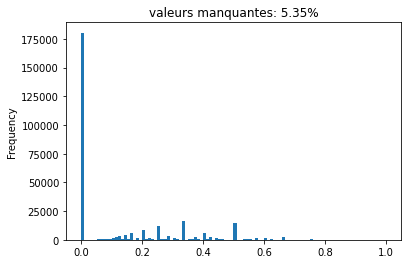

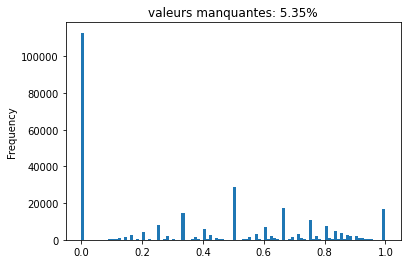

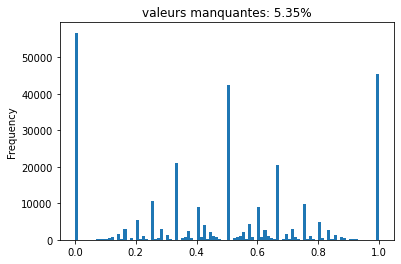

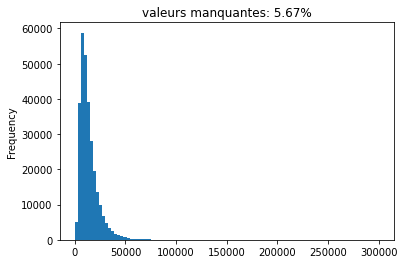

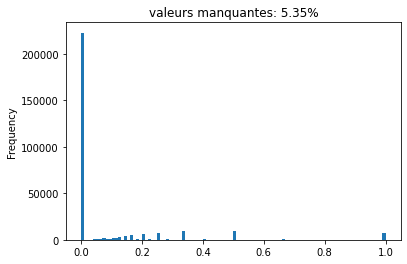

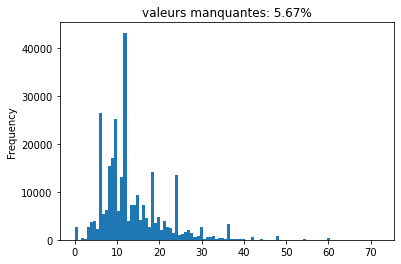

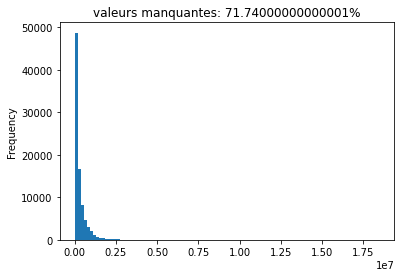

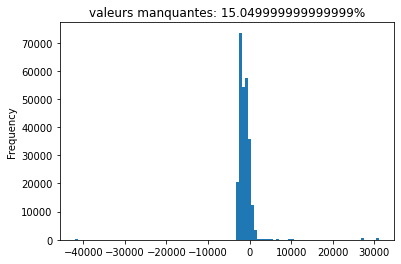

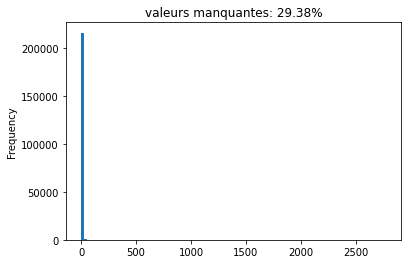

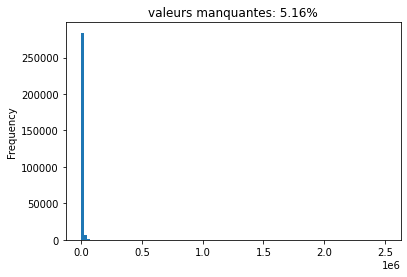

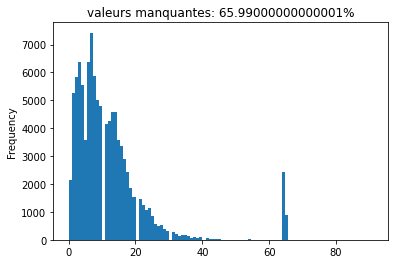

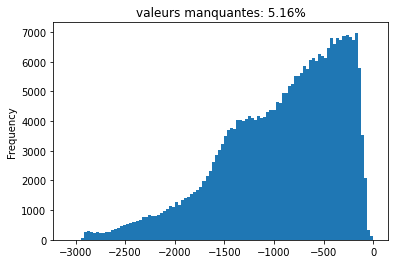

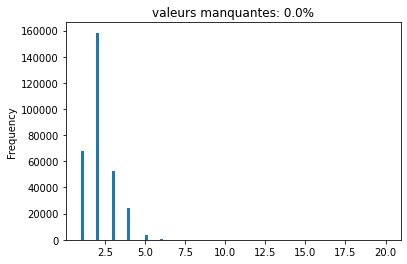

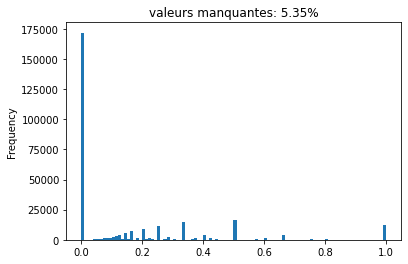

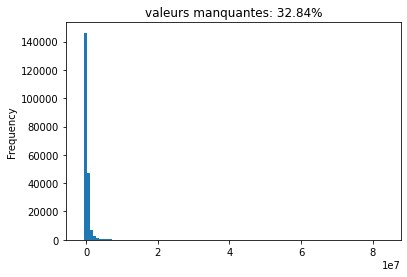

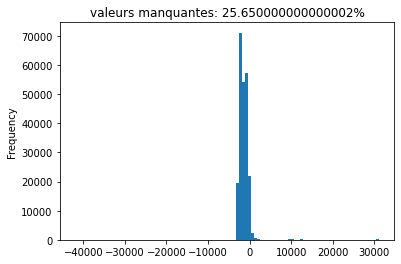

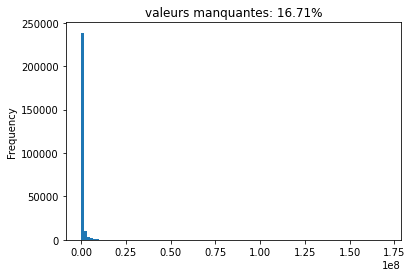

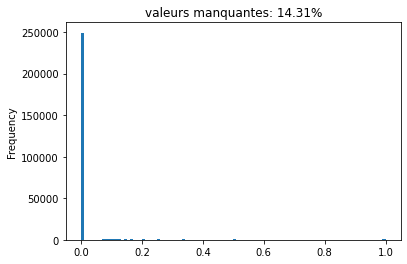

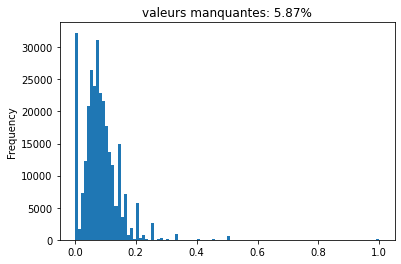

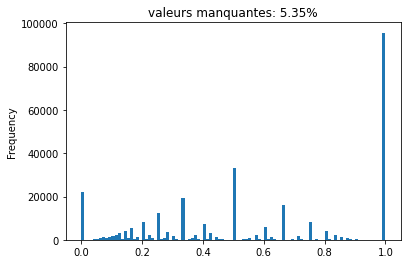

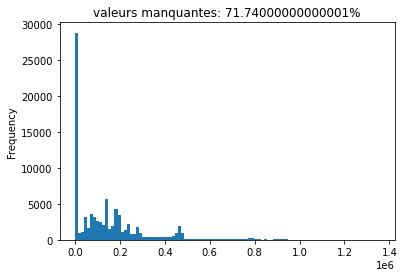

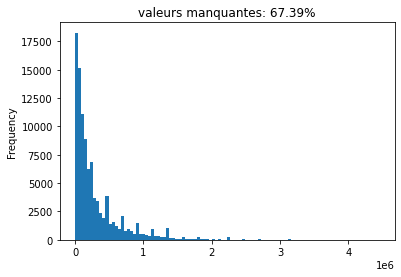

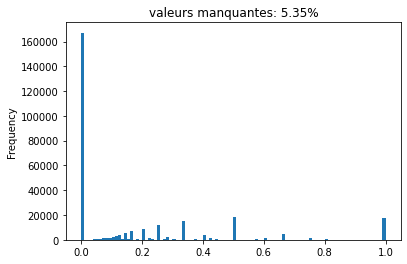

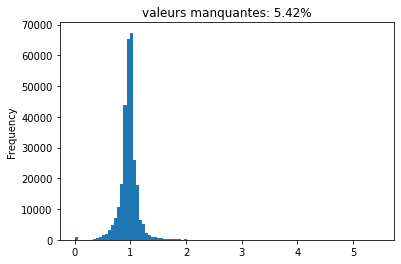

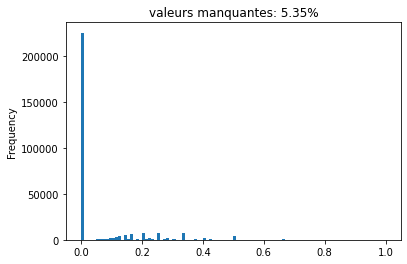

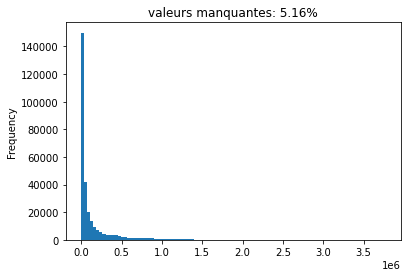

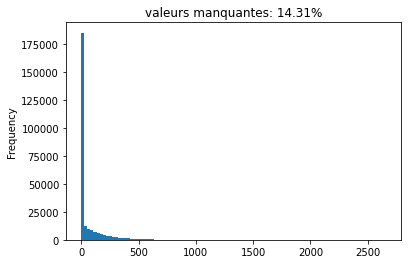

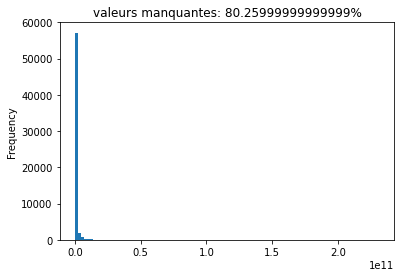

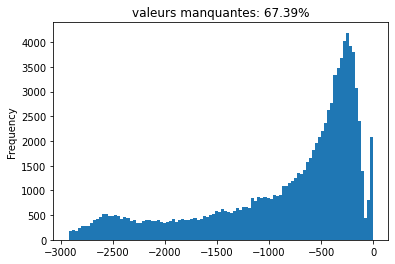

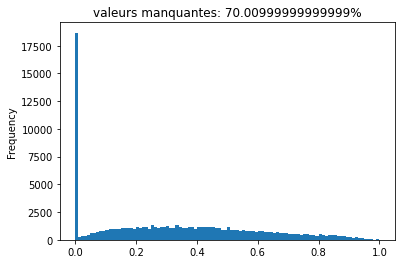

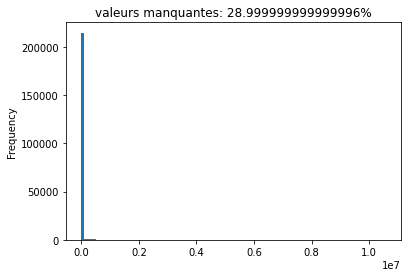

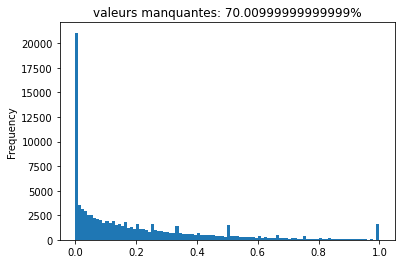

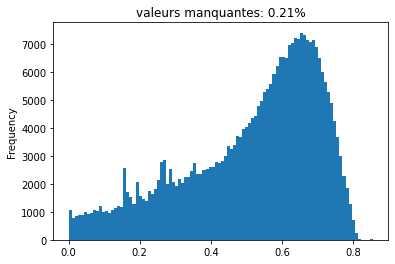

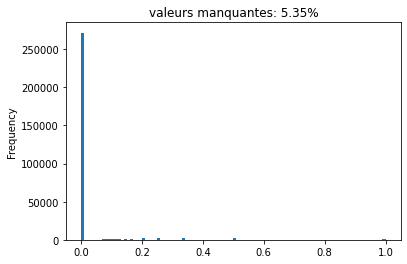

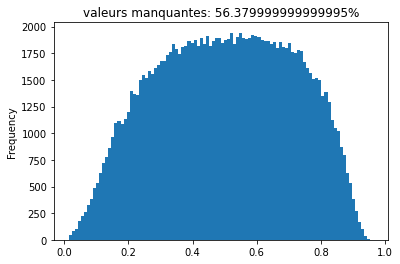

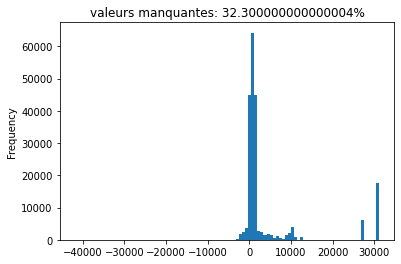

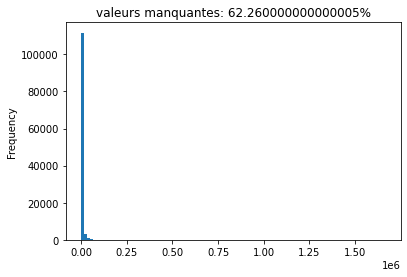

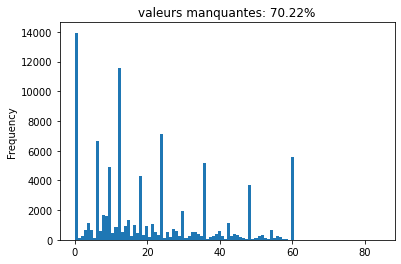

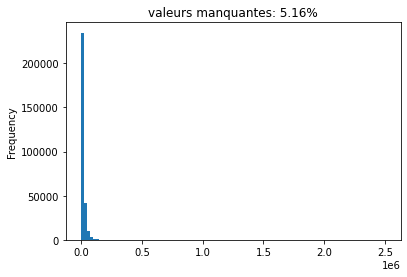

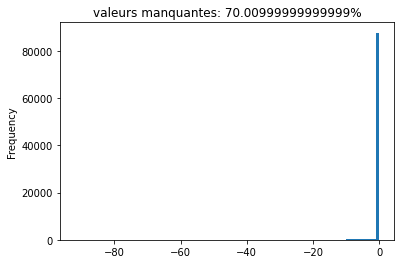

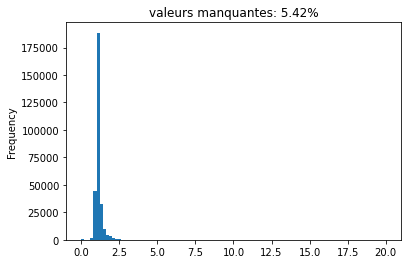

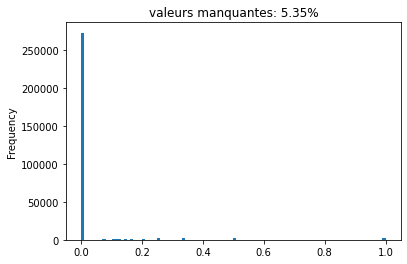

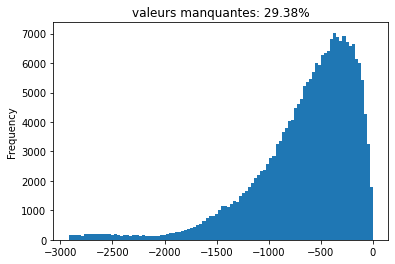

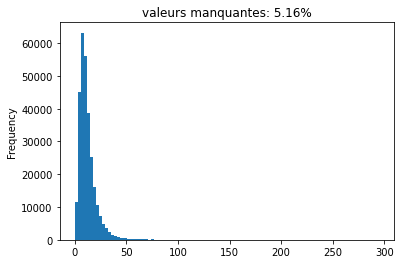

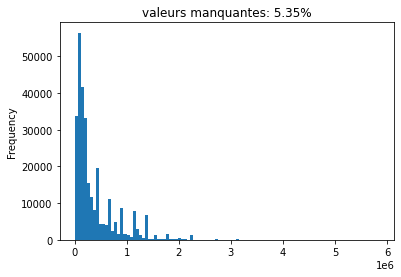

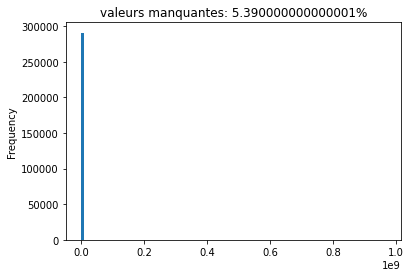

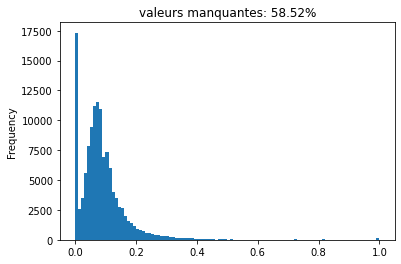

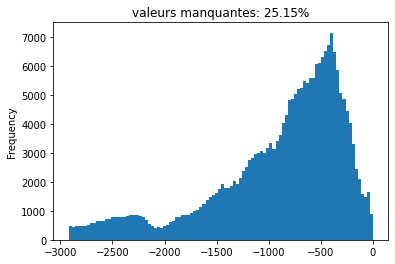

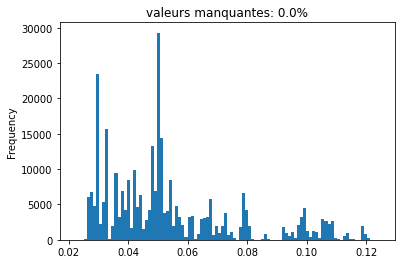

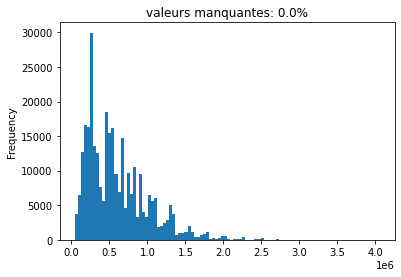

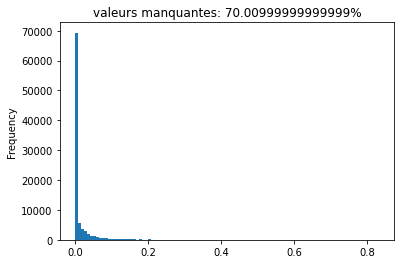

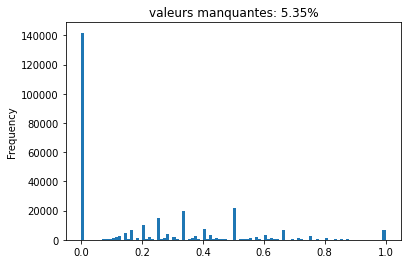

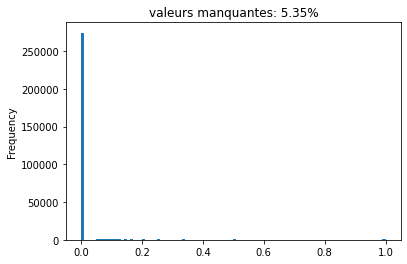

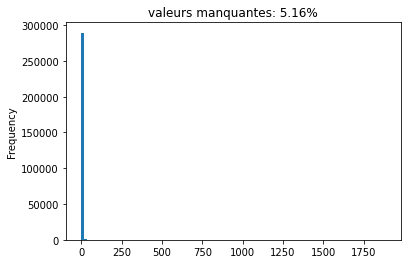

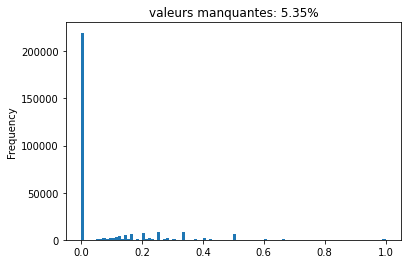

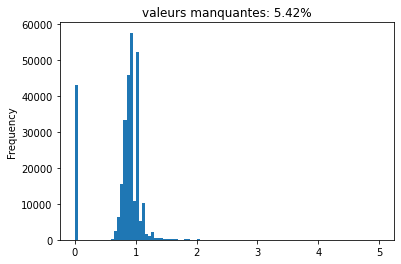

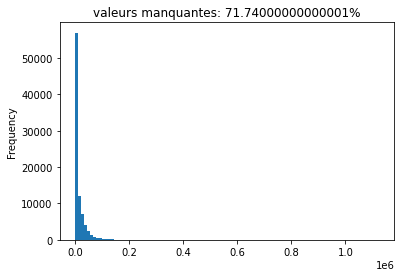

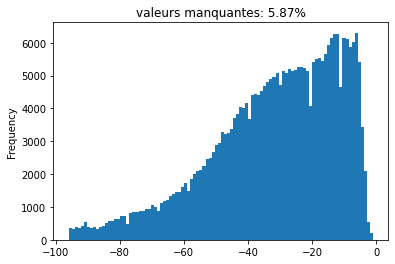

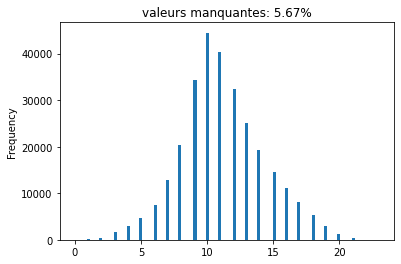

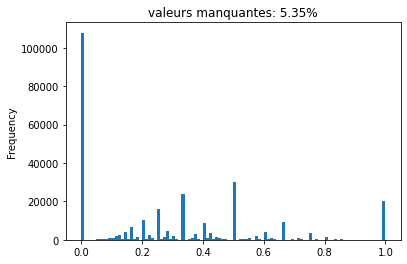

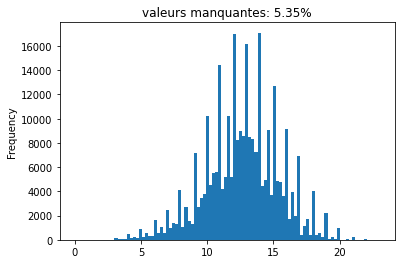

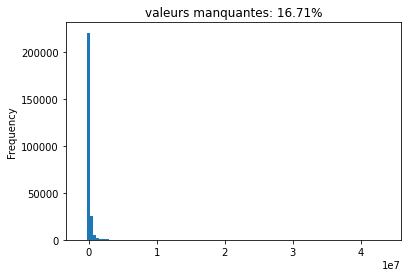

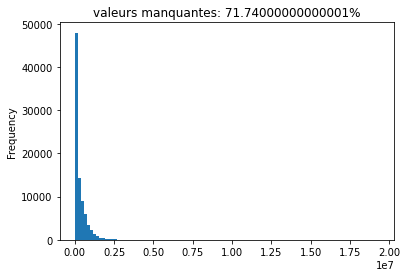

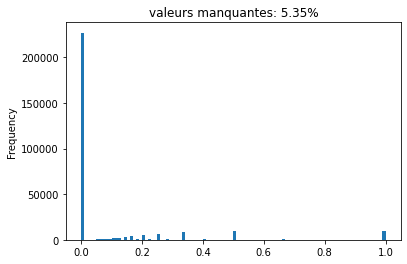

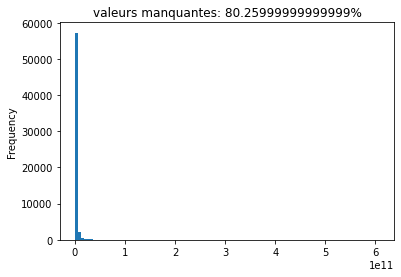

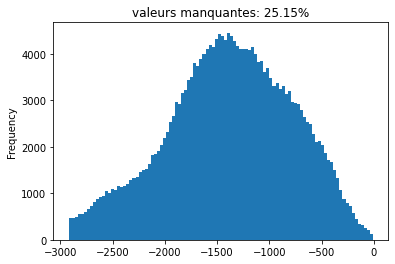

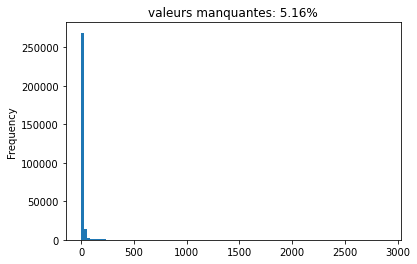

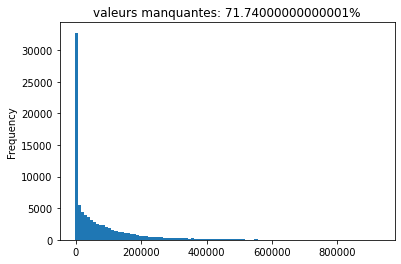

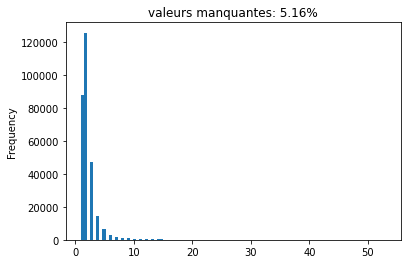

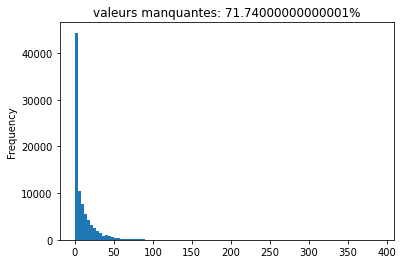

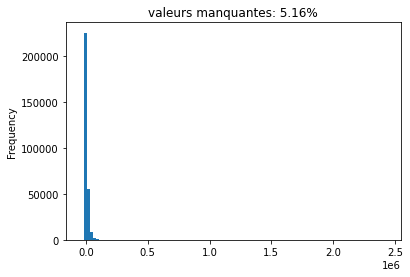

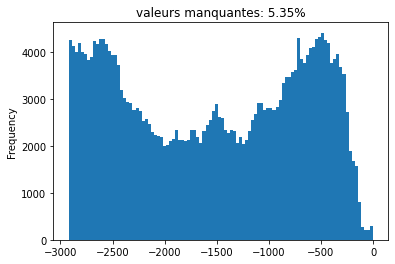

In [115]:
for k in d.select_dtypes('float64').columns: 
    d[k].plot(kind='hist',bins=100)
    plt.title('valeurs manquantes: '+str(np.round(d[k].isna().mean(),4)*100)+'%')
    plt.show()

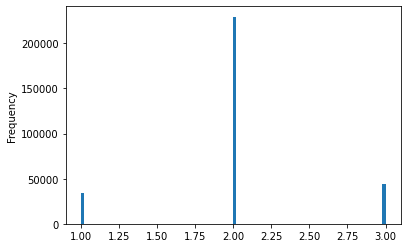

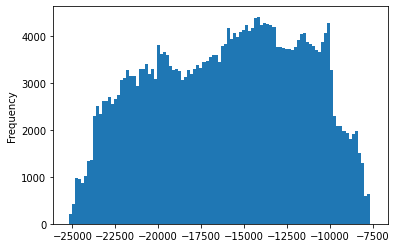

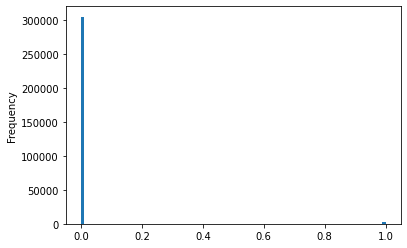

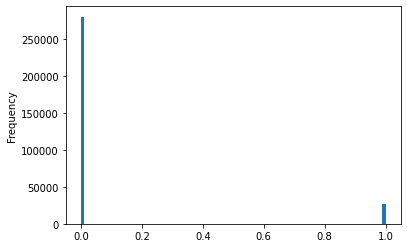

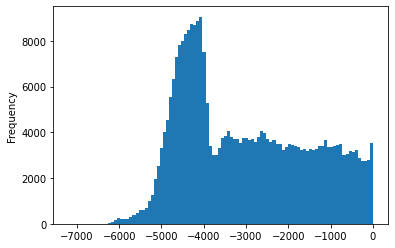

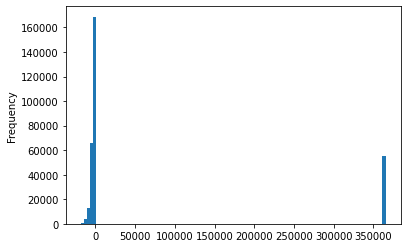

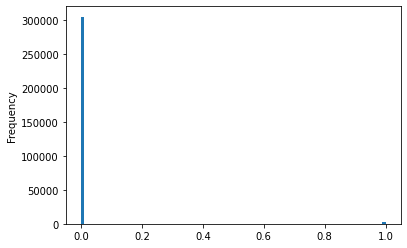

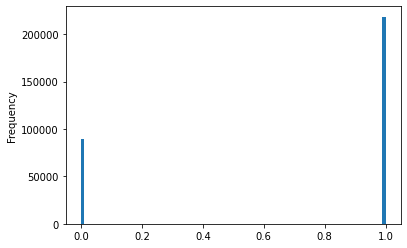

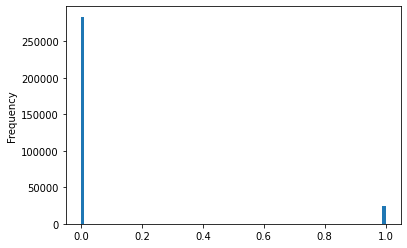

In [103]:
import matplotlib.pyplot as plt
for k in d.select_dtypes('int64').columns: 
    d[k].plot(kind='hist',bins=100)
    plt.show()

<AxesSubplot:ylabel='Frequency'>

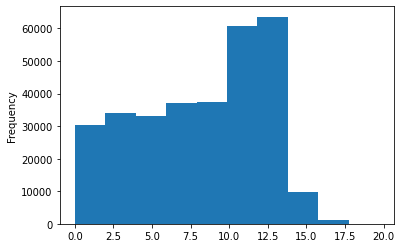

In [98]:
d.DAYS_ID_PUBLISH.apply(lambda x:-x/365,25).plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

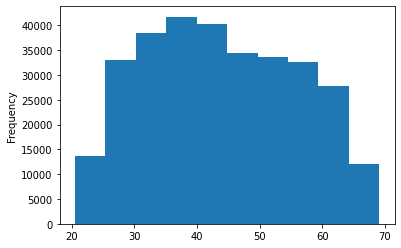

In [76]:
d.DAYS_BIRTH.apply(lambda x:-x/365,25).plot(kind='hist')

In [78]:
d.select_dtypes('int').nunique()

REGION_RATING_CLIENT_W_CITY        3
DAYS_BIRTH                     17460
FLAG_DOCUMENT_16                   2
FLAG_DOCUMENT_6                    2
DAYS_ID_PUBLISH                 6168
DAYS_EMPLOYED                  12574
FLAG_DOCUMENT_18                   2
FLAG_DOCUMENT_3                    2
REG_CITY_NOT_LIVE_CITY             2
dtype: int64

In [93]:
d[['TARGET','REGION_RATING_CLIENT_W_CITY']].groupby(['REGION_RATING_CLIENT_W_CITY','TARGET']).size().unstack(fill_value=0)

TARGET,0.0,1.0
REGION_RATING_CLIENT_W_CITY,,
1,32512,1654
2,211307,18169
3,38858,5000


In [95]:
d[['TARGET','REGION_RATING_CLIENT_W_CITY']].groupby(['REGION_RATING_CLIENT_W_CITY','TARGET']).size().unstack(fill_value=0).mean(axis=1)

REGION_RATING_CLIENT_W_CITY
1     17083.0
2    114738.0
3     21929.0
dtype: float64

In [8]:
import numpy as np

In [2]:
d=pd.read_csv('data_to_api.csv')

In [118]:
d.head()

,TARGET,REFUSED_APP_CREDIT_PERC_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,NAME_INCOME_TYPE,PREV_AMT_DOWN_PAYMENT_MIN,BURO_AMT_ANNUITY_MAX,CLOSED_DAYS_CREDIT_VAR,REGION_RATING_CLIENT_W_CITY,PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN,INSTAL_DBD_SUM,...,CC_AMT_PAYMENT_CURRENT_SUM,PREV_PRODUCT_COMBINATION_POS_industry_with_interest_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_MEAN,INSTAL_DPD_MAX,CC_AMT_BALANCE_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,INSTAL_PAYMENT_DIFF_MAX,PREV_DAYS_DECISION_MIN
0,1.0,NaN,15994.2825,Working,0.00,0.0,123956.700000,2,0.000000,388.0,...,NaN,0.000000,NaN,-974.500000,0.0,NaN,2.0,NaN,0.000,-606.0
1,0.0,NaN,810000.0000,State servant,0.00,NaN,820590.333333,1,0.000000,179.0,...,NaN,0.333333,NaN,-1665.666667,0.0,NaN,2.0,NaN,0.000,-2341.0
2,0.0,NaN,NaN,Working,4860.00,NaN,421362.000000,2,0.000000,23.0,...,NaN,0.000000,NaN,-867.000000,0.0,NaN,2.0,NaN,0.000,-815.0
3,0.0,0.759418,NaN,Working,2693.34,NaN,NaN,2,0.000000,310.0,...,0.0,0.111111,NaN,NaN,0.0,0.0,2.0,0.0,0.000,-617.0
4,0.0,NaN,NaN,Working,3105.00,NaN,NaN,2,0.166667,303.0,...,NaN,0.000000,NaN,-1149.000000,12.0,NaN,2.0,NaN,22655.655,-2357.0


In [119]:
d.shape

(307500, 234)

In [4]:
d.isna().mean().mean()

0.2504337711069418

In [7]:
(d.isna().mean().sort_values(ascending=False)==0).mean()

0.09829059829059829

In [17]:
(d.isna().mean()<=0.1).sum()

123

In [31]:
np.linspace(0,1)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

TypeError: 'float' object cannot be interpreted as an integer

In [41]:
for k in np.linspace(0,1):
    print(f'Nb Features NaN %{k:-<50}{(d.isna().mean()<k).sum()}')


Nb Features NaN %0.0-----------------------------------------------0
Nb Features NaN %0.02040816326530612-------------------------------31
Nb Features NaN %0.04081632653061224-------------------------------31
Nb Features NaN %0.061224489795918366------------------------------123
Nb Features NaN %0.08163265306122448-------------------------------123
Nb Features NaN %0.1020408163265306--------------------------------123
Nb Features NaN %0.12244897959183673-------------------------------128
Nb Features NaN %0.14285714285714285-------------------------------130
Nb Features NaN %0.16326530612244897-------------------------------146
Nb Features NaN %0.18367346938775508-------------------------------148
Nb Features NaN %0.2040816326530612--------------------------------149
Nb Features NaN %0.22448979591836732-------------------------------149
Nb Features NaN %0.24489795918367346-------------------------------149
Nb Features NaN %0.26530612244897955-------------------------------156
Nb Feature

In [120]:
d.columns=['_'.join(k.split(' ')) for k in d.columns]
d.columns=['_'.join(k.split(' ')) for k in d.columns]
d.columns=['_'.join(k.split('+')) for k in d.columns]
d.columns=['_'.join(k.split('-')) for k in d.columns]
d.columns=['_'.join(k.split('(')) for k in d.columns]
d.columns=['_'.join(k.split(')')) for k in d.columns]
d.columns=['_'.join(k.split(':')) for k in d.columns]
d.columns=['_'.join(k.split(',')) for k in d.columns]
d.columns=['_'.join(k.split('.')) for k in d.columns]
d.columns=['_'.join(k.split(';')) for k in d.columns]
d.columns=['_'.join(k.split('/')) for k in d.columns]

In [8]:
def split_dfmodel_trainXeval(df_):
 # df_.replace({np.inf: np.nan},inplace=True)
  dftrain,dfeval=df_[df_.TARGET.notna()],df_[df_.TARGET.isna()]
  del df_
  dftrain=dftrain.drop(['SK_ID_CURR'],axis=1)
  X_eval=dfeval.drop(['TARGET'],axis=1)
  del dfeval
  return dftrain,X_eval

In [10]:
df,eval=split_dfmodel_trainXeval(d)

In [122]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [125]:
encod=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
imputer=SimpleImputer(strategy="constant")
pip_cat=Pipeline(steps=[('imput_cat',SimpleImputer(strategy="constant",fill_value='other')),
                        ('encod',encod)])


preprocessor_ord = ColumnTransformer(
        transformers=[
            ("cat", pip_cat, d.drop('TARGET',axis=1).select_dtypes('object').columns),
            ("num",imputer,d.drop('TARGET',axis=1).select_dtypes(exclude='object').columns)
        
        ]
    
    )

In [123]:
best_model=LGBMClassifier(class_weight='balanced',
                          learning_rate=0.04663213371827939,
                          max_depth=2,
                          n_estimators=1776,
                          num_leaves=41,
                          reg_alpha=0.32250843627257003,
                          reg_lambda=0.0038916848015966505)

In [126]:
pipeline_clf=Pipeline(steps=[('preprocessor',preprocessor_ord),
                             ('classifier',best_model)])

In [127]:
pipeline_clf.fit(d.drop('TARGET',axis=1),d.TARGET)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imput_cat',
                                                                   SimpleImputer(fill_value='other',
                                                                                 strategy='constant')),
                                                                  ('encod',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'CODE_GENDER',
       'NAME_CONTRACT_TYPE', 'NAME_HOUSING_TYPE', 'WALLSMATERIAL_M...
       'INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE',
       'CC_CNT_DRAWINGS_ATM_CURRENT_SUM', 'INSTAL_PAYMENT_DIFF_MAX',
       'PREV_DAYS_DECISION_MI

In [128]:
import pickle
pickle_out = open("Pipeline_final_clf.pkl","wb")
pickle.dump(pipeline_clf, pickle_out)
pickle_out.close()

In [129]:
import shap
shap.initjs()

In [130]:
shap.__version__


'0.41.0'

In [131]:
x_prep_shap=pd.DataFrame(pipeline_clf['preprocessor'].transform(d.drop('TARGET',axis=1)),columns=d.drop('TARGET',axis=1).columns)

In [132]:
explainer = shap.TreeExplainer(pipeline_clf['classifier'])
shap_values = explainer.shap_values(x_prep_shap)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [243]:
pd.DataFrame(abs(shap_values[0]),columns=x_prep_shap.columns).mean().reset_index().rename({0:'Shapley_importance','index':'Features'},axis=1).to_csv('shapley_importance.csv',index=False)

In [244]:
test=pd.read_csv('shapley_importance.csv')


,Features,Shapley_importance
0,REFUSED_APP_CREDIT_PERC_MIN,0.040214
1,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,0.026850
2,NAME_INCOME_TYPE,0.123815
3,PREV_AMT_DOWN_PAYMENT_MIN,0.038805
4,BURO_AMT_ANNUITY_MAX,0.004729
...,...,...
228,CC_AMT_BALANCE_MEAN,0.011091
229,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,0.007533
230,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,0.002689
231,INSTAL_PAYMENT_DIFF_MAX,0.013031


In [245]:
test.sort_values(by='Shapley_importance')

,Features,Shapley_importance
28,ACTIVE_AMT_ANNUITY_MEAN,0.000000
97,PREV_NAME_YIELD_GROUP_XNA_MEAN,0.000000
92,CLOSED_MONTHS_BALANCE_MAX_MAX,0.000000
217,CC_AMT_DRAWINGS_CURRENT_MEAN,0.000000
108,REFUSED_AMT_ANNUITY_MAX,0.000000
...,...,...
2,NAME_INCOME_TYPE,0.123815
208,PAYMENT_RATE,0.143505
192,EXT_SOURCE_1,0.151291
147,NAME_FAMILY_STATUS,0.271573


In [235]:
pd.DataFrame(abs(shap_values[0]),columns=x_prep_shap.columns).mean().to_csv('test.csv')

In [236]:
pd.read_csv('test.csv')

,Unnamed: 0,0
0,REFUSED_APP_CREDIT_PERC_MIN,0.040214
1,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,0.026850
2,NAME_INCOME_TYPE,0.123815
3,PREV_AMT_DOWN_PAYMENT_MIN,0.038805
4,BURO_AMT_ANNUITY_MAX,0.004729
...,...,...
228,CC_AMT_BALANCE_MEAN,0.011091
229,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,0.007533
230,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,0.002689
231,INSTAL_PAYMENT_DIFF_MAX,0.013031


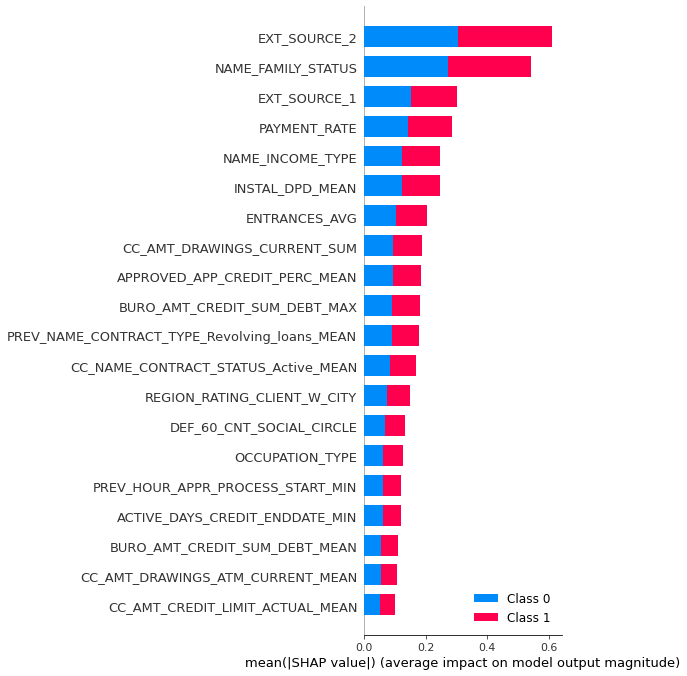

In [140]:
shap.summary_plot(shap_values, x_prep_shap,feature_names=d.drop('TARGET',axis=1).columns)


In [205]:
x_prep_shap

,REFUSED_APP_CREDIT_PERC_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,NAME_INCOME_TYPE,PREV_AMT_DOWN_PAYMENT_MIN,BURO_AMT_ANNUITY_MAX,CLOSED_DAYS_CREDIT_VAR,REGION_RATING_CLIENT_W_CITY,PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN,INSTAL_DBD_SUM,OCCUPATION_TYPE,...,CC_AMT_PAYMENT_CURRENT_SUM,PREV_PRODUCT_COMBINATION_POS_industry_with_interest_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_MEAN,INSTAL_DPD_MAX,CC_AMT_BALANCE_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,INSTAL_PAYMENT_DIFF_MAX,PREV_DAYS_DECISION_MIN
0,6.0,8.0,1.0,0.0,1.0,5.0,0.0,6.0,5.0,3.0,...,0.0,0.000000,0.0,-974.500000,0.0,0.0,2.0,0.0,0.000,-606.0
1,3.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,39.0,1.0,...,0.0,0.333333,0.0,-1665.666667,0.0,0.0,2.0,0.0,0.000,-2341.0
2,6.0,8.0,1.0,1.0,1.0,7.0,1.0,1.0,11.0,3.0,...,0.0,0.000000,0.0,-867.000000,0.0,0.0,2.0,0.0,0.000,-815.0
3,6.0,8.0,0.0,0.0,1.0,7.0,0.0,6.0,5.0,0.0,...,0.0,0.111111,0.0,0.000000,0.0,0.0,2.0,0.0,0.000,-617.0
4,6.0,3.0,1.0,0.0,1.0,7.0,0.0,4.0,37.0,3.0,...,0.0,0.000000,0.0,-1149.000000,12.0,0.0,2.0,0.0,22655.655,-2357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,6.0,14.0,1.0,0.0,5.0,5.0,0.0,4.0,43.0,2.0,...,0.0,0.000000,0.0,0.000000,0.0,0.0,2.0,0.0,0.000,-273.0
307496,2.0,18.0,0.0,0.0,1.0,5.0,0.0,1.0,57.0,4.0,...,0.0,0.000000,0.0,0.000000,3.0,0.0,1.0,0.0,0.000,-2497.0
307497,6.0,10.0,0.0,0.0,1.0,4.0,0.0,4.0,39.0,2.0,...,0.0,0.000000,0.0,-919.000000,9.0,0.0,1.0,0.0,3945.825,-2851.0
307498,1.0,8.0,0.0,0.0,1.0,5.0,0.0,6.0,3.0,1.0,...,0.0,0.000000,0.0,-1104.000000,0.0,0.0,1.0,0.0,0.000,-322.0


In [206]:
d.drop('TARGET',axis=1)

,REFUSED_APP_CREDIT_PERC_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,NAME_INCOME_TYPE,PREV_AMT_DOWN_PAYMENT_MIN,BURO_AMT_ANNUITY_MAX,CLOSED_DAYS_CREDIT_VAR,REGION_RATING_CLIENT_W_CITY,PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN,INSTAL_DBD_SUM,OCCUPATION_TYPE,...,CC_AMT_PAYMENT_CURRENT_SUM,PREV_PRODUCT_COMBINATION_POS_industry_with_interest_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_MEAN,INSTAL_DPD_MAX,CC_AMT_BALANCE_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,INSTAL_PAYMENT_DIFF_MAX,PREV_DAYS_DECISION_MIN
0,NaN,15994.2825,Working,0.00,0.0,123956.700000,2,0.000000,388.0,Laborers,...,NaN,0.000000,NaN,-974.500000,0.0,NaN,2.0,NaN,0.000,-606.0
1,NaN,810000.0000,State servant,0.00,NaN,820590.333333,1,0.000000,179.0,Core staff,...,NaN,0.333333,NaN,-1665.666667,0.0,NaN,2.0,NaN,0.000,-2341.0
2,NaN,NaN,Working,4860.00,NaN,421362.000000,2,0.000000,23.0,Laborers,...,NaN,0.000000,NaN,-867.000000,0.0,NaN,2.0,NaN,0.000,-815.0
3,0.759418,NaN,Working,2693.34,NaN,NaN,2,0.000000,310.0,Laborers,...,0.0,0.111111,NaN,NaN,0.0,0.0,2.0,0.0,0.000,-617.0
4,NaN,NaN,Working,3105.00,NaN,NaN,2,0.166667,303.0,Core staff,...,NaN,0.000000,NaN,-1149.000000,12.0,NaN,2.0,NaN,22655.655,-2357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307495,NaN,NaN,Working,0.00,NaN,NaN,1,0.000000,254.0,Sales staff,...,NaN,0.000000,NaN,NaN,0.0,NaN,2.0,NaN,0.000,-273.0
307496,NaN,NaN,Pensioner,3456.00,NaN,NaN,2,0.000000,20.0,NaN,...,NaN,0.000000,NaN,NaN,3.0,NaN,1.0,NaN,0.000,-2497.0
307497,NaN,0.0000,Working,2893.50,58369.5,0.000000,3,0.000000,212.0,Managers,...,NaN,0.000000,NaN,-919.000000,9.0,NaN,1.0,NaN,3945.825,-2851.0
307498,NaN,NaN,Commercial associate,0.00,0.0,NaN,2,0.000000,361.0,Laborers,...,NaN,0.000000,NaN,-1104.000000,0.0,NaN,1.0,NaN,0.000,-322.0


In [222]:
pd.DataFrame(abs(shap_values[0]),columns=x_prep_shap.columns).mean().reset_index().rename({0:'shap_val','index':'feature'},axis=1).to_csv('Shap_importance.csv',header='feature',index=False)

In [214]:
pd.DataFrame(abs(shap_values[0]),columns=x_prep_shap.columns).mean().to_csv('Shap_importance.csv',header=index)

NameError: name 'index' is not defined

In [230]:
l=pd.read_csv('Shap_importance.csv')

In [232]:
l.sort_values(by='feature')

,feature,shap_val
28,ACTIVE_AMT_ANNUITY_MEAN,0.000000
194,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,0.020560
170,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,0.003416
1,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,0.026850
132,ACTIVE_AMT_CREDIT_SUM_MEAN,0.000692
...,...,...
216,REG_CITY_NOT_LIVE_CITY,0.013086
59,WALLSMATERIAL_MODE,0.001610
82,WEEKDAY_APPR_PROCESS_START,0.000586
98,YEARS_BEGINEXPLUATATION_AVG,0.000853


In [142]:
filename_expl = 'explainer_final.sav'
pickle.dump(explainer, open(filename_expl, 'wb'))



In [147]:
d.sample(frac=0.1,random_state=42).TARGET.mean()

0.08188617886178862

In [ ]:
d.sample(frac=0.1,random_state=42).TARGET.mean()

In [161]:
for k in np.linspace(0,1):
    print(f'Nb clients NaN %{k:-<50}{(d.isna().mean(axis=1)<k).sum()}')




Nb clients NaN %0.0-----------------------------------------------0
Nb clients NaN %0.02040816326530612-------------------------------1769
Nb clients NaN %0.04081632653061224-------------------------------3928
Nb clients NaN %0.061224489795918366------------------------------11482
Nb clients NaN %0.08163265306122448-------------------------------18977
Nb clients NaN %0.1020408163265306--------------------------------28731
Nb clients NaN %0.12244897959183673-------------------------------40775
Nb clients NaN %0.14285714285714285-------------------------------56550
Nb clients NaN %0.16326530612244897-------------------------------70367
Nb clients NaN %0.18367346938775508-------------------------------92220
Nb clients NaN %0.2040816326530612--------------------------------112366
Nb clients NaN %0.22448979591836732-------------------------------150521
Nb clients NaN %0.24489795918367346-------------------------------177156
Nb clients NaN %0.26530612244897955-------------------------------2

0         0.170940
1         0.217949
2         0.307692
3         0.320513
4         0.320513
            ...   
307495    0.405983
307496    0.414530
307497    0.179487
307498    0.264957
307499    0.132479
Length: 307500, dtype: float64

In [167]:
d_sample_na=d[((d.isna().mean(axis=1))<0.1)]

In [189]:
d_api_1=d_sample_na[d_sample_na.TARGET==1].sample(1500,random_state=42)

In [190]:
d_api_0=d_sample_na[d_sample_na.TARGET==0].sample(1500,random_state=42)

In [191]:
d_api_0.shape,d_api_1.shape,d_api_1.isna().mean().mean(),d_api_0.isna().mean().mean()

((1500, 234), (1500, 234), 0.06543589743589744, 0.06772079772079773)

In [192]:
d_api_0.append(d_api_1).TARGET.value_counts()

0.0    1500
1.0    1500
Name: TARGET, dtype: int64

In [193]:
d_fapi=d_api_0.append(d_api_1)
d_fapi.head()

,TARGET,REFUSED_APP_CREDIT_PERC_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,NAME_INCOME_TYPE,PREV_AMT_DOWN_PAYMENT_MIN,BURO_AMT_ANNUITY_MAX,CLOSED_DAYS_CREDIT_VAR,REGION_RATING_CLIENT_W_CITY,PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN,INSTAL_DBD_SUM,...,CC_AMT_PAYMENT_CURRENT_SUM,PREV_PRODUCT_COMBINATION_POS_industry_with_interest_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_MEAN,INSTAL_DPD_MAX,CC_AMT_BALANCE_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,INSTAL_PAYMENT_DIFF_MAX,PREV_DAYS_DECISION_MIN
244564,0.0,0.895927,0.0000,Commercial associate,2560.5,NaN,791448.000000,3,0.0,335.0,...,1219019.31,0.0,9.235642e+08,-1886.000000,3.0,60952.886757,3.0,5.0,0.00,-1498.0
91944,0.0,1.000000,0.0000,Commercial associate,0.0,NaN,254713.200000,2,0.0,334.0,...,5868252.00,0.0,0.000000e+00,-1154.200000,0.0,343386.257143,2.0,0.0,0.00,-2884.0
121126,0.0,0.933464,29250.0000,Working,0.0,NaN,82502.333333,3,0.0,1046.0,...,68175.00,0.0,4.556250e+09,-1165.333333,4.0,340959.456000,3.0,1.0,1076.76,-1540.0
38917,0.0,0.769231,4848.9975,Working,7222.5,NaN,22504.333333,2,0.0,89.0,...,117090.00,0.0,3.143812e+09,-624.666667,2.0,234358.277727,3.0,20.0,0.00,-823.0
65344,0.0,NaN,NaN,Working,0.0,13230.0,251662.400000,2,0.0,74.0,...,153900.00,0.0,4.815000e+08,-1809.000000,2.0,151479.050000,2.0,4.0,24293.88,-543.0


In [194]:
d_fapi.to_csv('d_sample_to_api.csv',index=False)

In [198]:
d_fapi.head()

,TARGET,REFUSED_APP_CREDIT_PERC_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,NAME_INCOME_TYPE,PREV_AMT_DOWN_PAYMENT_MIN,BURO_AMT_ANNUITY_MAX,CLOSED_DAYS_CREDIT_VAR,REGION_RATING_CLIENT_W_CITY,PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN,INSTAL_DBD_SUM,...,CC_AMT_PAYMENT_CURRENT_SUM,PREV_PRODUCT_COMBINATION_POS_industry_with_interest_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_MEAN,INSTAL_DPD_MAX,CC_AMT_BALANCE_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,INSTAL_PAYMENT_DIFF_MAX,PREV_DAYS_DECISION_MIN
244564,0.0,0.895927,0.0000,Commercial associate,2560.5,NaN,791448.000000,3,0.0,335.0,...,1219019.31,0.0,9.235642e+08,-1886.000000,3.0,60952.886757,3.0,5.0,0.00,-1498.0
91944,0.0,1.000000,0.0000,Commercial associate,0.0,NaN,254713.200000,2,0.0,334.0,...,5868252.00,0.0,0.000000e+00,-1154.200000,0.0,343386.257143,2.0,0.0,0.00,-2884.0
121126,0.0,0.933464,29250.0000,Working,0.0,NaN,82502.333333,3,0.0,1046.0,...,68175.00,0.0,4.556250e+09,-1165.333333,4.0,340959.456000,3.0,1.0,1076.76,-1540.0
38917,0.0,0.769231,4848.9975,Working,7222.5,NaN,22504.333333,2,0.0,89.0,...,117090.00,0.0,3.143812e+09,-624.666667,2.0,234358.277727,3.0,20.0,0.00,-823.0
65344,0.0,NaN,NaN,Working,0.0,13230.0,251662.400000,2,0.0,74.0,...,153900.00,0.0,4.815000e+08,-1809.000000,2.0,151479.050000,2.0,4.0,24293.88,-543.0


In [359]:
evalp=pd.read_csv('data_to_dashboard.csv')

In [360]:
evalp.shape

(48744, 234)

In [363]:
evalp['TARGET']=pipeline_clf.predict_proba(evalp.drop('SK_ID_CURR',axis=1))[:,1]

In [367]:
evalp[['SK_ID_CURR','TARGET']].to_csv('sub.csv',index=False)

In [197]:
evalp.head()

,SK_ID_CURR,REFUSED_APP_CREDIT_PERC_MIN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,NAME_INCOME_TYPE,PREV_AMT_DOWN_PAYMENT_MIN,BURO_AMT_ANNUITY_MAX,CLOSED_DAYS_CREDIT_VAR,REGION_RATING_CLIENT_W_CITY,PREV_CHANNEL_TYPE_AP___Cash_loan__MEAN,INSTAL_DBD_SUM,...,CC_AMT_PAYMENT_CURRENT_SUM,PREV_PRODUCT_COMBINATION_POS_industry_with_interest_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_VAR,CLOSED_DAYS_CREDIT_MEAN,INSTAL_DPD_MAX,CC_AMT_BALANCE_MEAN,INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,INSTAL_PAYMENT_DIFF_MAX,PREV_DAYS_DECISION_MIN
0,100001,NaN,0.00,Working,2520.0,10822.50,119594.250000,2,0.0,62.0,...,NaN,0.0,NaN,-1054.250000,11.0,NaN,2.0,NaN,0.00,-1740.0
1,100005,NaN,0.00,Working,4464.0,4261.50,NaN,2,0.0,213.0,...,NaN,0.0,NaN,-373.000000,1.0,NaN,2.0,NaN,0.00,-757.0
2,100013,NaN,NaN,Working,0.0,0.00,155208.333333,2,0.0,887.0,...,688161.24,0.0,8.249688e+08,-1737.500000,21.0,18159.919219,3.0,23.0,23147.82,-1999.0
3,100028,NaN,25347.69,Working,0.0,12897.09,224887.238095,2,0.0,369.0,...,283724.46,0.0,9.033298e+06,-1652.714286,7.0,8085.058163,3.0,2.0,8505.00,-1805.0
4,100038,NaN,NaN,Working,8095.5,NaN,NaN,2,0.0,147.0,...,NaN,0.0,NaN,NaN,0.0,NaN,1.0,NaN,0.00,-821.0


In [201]:
evalp[((evalp.isna().mean(axis=1))<0.1)].sample(3000,random_state=42).to_csv('d_to_dash_sample.csv',index=False)

In [157]:
d[(d.TARGET==1)].sample(frac=0.065).isna().mean().mean()

0.24529861541640838

In [151]:
d[(d.TARGET==0)].isna().mean().mean()

0.2508148060262311

In [145]:
d.sample(frac=0.1).isna().mean()

TARGET                                   0.000000
REFUSED_APP_CREDIT_PERC_MIN              0.691187
ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN         0.384846
NAME_INCOME_TYPE                         0.000000
PREV_AMT_DOWN_PAYMENT_MIN                0.110699
                                           ...   
CC_AMT_BALANCE_MEAN                      0.714309
INSTAL_NUM_INSTALMENT_VERSION_NUNIQUE    0.052325
CC_CNT_DRAWINGS_ATM_CURRENT_SUM          0.714309
INSTAL_PAYMENT_DIFF_MAX                  0.052358
PREV_DAYS_DECISION_MIN                   0.054862
Length: 234, dtype: float64

In [31]:
df_nn=pd.read_csv('..\P7_api\data_to_api.csv')

In [33]:
df_nn.isna().mean().mean()

0.23683282051282048

In [36]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=30)
neigh.fit(preproc.transform(df_nn.drop('TARGET',axis=1)))


NearestNeighbors(n_neighbors=30)

In [34]:
preproc=pipeline_clf['preprocessor']
model=pipeline_clf['classifier']

In [39]:
t=df_nn.drop('TARGET',axis=1).iloc[:1]

In [40]:
xclient=preproc.transform(t)

In [41]:
idx = neigh.kneighbors(X=xclient,n_neighbors=20,return_distance=False).ravel()
   

In [42]:
idx

array([    0, 26165,  8615, 27402, 24867,  4766, 26804, 15794, 13185,
        6027, 21067, 25734, 28106, 28468, 16630, 10921,  9425, 23291,
       14489,  7791], dtype=int64)

In [54]:
nn=pd.DataFrame(preproc.transform(df_nn.drop('TARGET',axis=1).iloc[idx]),columns=t.colum


In [78]:
df_nn.iloc[idx].isna().mean().mean()

0.38723076923076927

In [81]:
df_nn.iloc[idx].select_dtypes('object').fillna('Autre').isna().mean()

NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
NAME_TYPE_SUITE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
OCCUPATION_TYPE               0.0
WEEKDAY_APPR_PROCESS_START    0.0
ORGANIZATION_TYPE             0.0
FONDKAPREMONT_MODE            0.0
HOUSETYPE_MODE                0.0
WALLSMATERIAL_MODE            0.0
EMERGENCYSTATE_MODE           0.0
dtype: float64

In [86]:
nn=df_nn.iloc[idx]

In [87]:
nn.isna().mean().mean()

0.38723076923076927

In [88]:
nn[nn.select_dtypes('object').columns]=nn.select_dtypes('object').fillna('Autre')

In [90]:
nn[nn.select_dtypes(exclude='object').columns]=nn.select_dtypes(exclude='object').fillna(0)

In [91]:
nn.isna().mean().mean()

0.0

In [59]:
idx

array([    0, 26165,  8615, 27402, 24867,  4766, 26804, 15794, 13185,
        6027, 21067, 25734, 28106, 28468, 16630, 10921,  9425, 23291,
       14489,  7791], dtype=int64)

In [75]:
df_nn.where(df_nn.notna(), None).to_dict()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MIN,CC_CNT_INSTALMENT_MATURE_CUM_MAX,CC_CNT_INSTALMENT_MATURE_CUM_VAR,CC_NAME_CONTRACT_STATUS_Completed_VAR
0,0.0,Cash loans,F,N,N,0,112500.0,180000.0,14220.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,Revolving loans,F,N,Y,0,90000.0,270000.0,13500.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,Cash loans,F,N,Y,0,225000.0,1170400.5,49716.0,Unaccompanied,...,0.833333,10.0,1.969697,44.0,2.777778,83.256410,0.0,4.0,3.600791,0.000000
3,0.0,Cash loans,F,Y,N,0,157500.0,679500.0,26946.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,Cash loans,F,N,N,0,211500.0,970380.0,25726.5,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30745,0.0,Cash loans,F,N,N,0,67500.0,90000.0,6012.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30746,0.0,Cash loans,M,Y,Y,1,157500.0,325908.0,19822.5,Unaccompanied,...,0.000000,0.0,0.000000,13.0,2.125000,21.267857,0.0,3.0,1.357143,0.267857
30747,0.0,Cash loans,F,N,Y,1,54000.0,134775.0,7011.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30748,1.0,Cash loans,M,Y,N,0,202500.0,500211.0,48861.0,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
nn['TARGET']=df_nn.iloc[idx].TARGET.values


In [70]:
nn.isna().mean()

NAME_CONTRACT_TYPE                       0.0
CODE_GENDER                              0.0
FLAG_OWN_CAR                             0.0
FLAG_OWN_REALTY                          0.0
CNT_CHILDREN                             0.0
                                        ... 
CC_CNT_DRAWINGS_POS_CURRENT_MIN          0.0
CC_CNT_INSTALMENT_MATURE_CUM_MAX         0.0
CC_CNT_INSTALMENT_MATURE_CUM_VAR         0.0
CC_NAME_CONTRACT_STATUS_Completed_VAR    0.0
TARGET                                   0.0
Length: 325, dtype: float64

In [69]:
nn

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_ATM_CURRENT_VAR,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_VAR,CC_CNT_DRAWINGS_POS_CURRENT_MIN,CC_CNT_INSTALMENT_MATURE_CUM_MAX,CC_CNT_INSTALMENT_MATURE_CUM_VAR,CC_NAME_CONTRACT_STATUS_Completed_VAR,TARGET
0,0.0,0.0,0.0,0.0,6.0,1.0,4.0,3.0,14.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,6.0,3.0,4.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,6.0,6.0,4.0,3.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,6.0,4.0,2.0,14.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,6.0,1.0,4.0,1.0,14.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,6.0,3.0,2.0,1.0,3.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,1.0,1.0,1.0,6.0,4.0,3.0,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,6.0,6.0,4.0,0.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,6.0,6.0,1.0,3.0,11.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,6.0,4.0,1.0,14.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
import simplejson as json
json.dumps(thing, ignore_nan=True)

ModuleNotFoundError: No module named 'simplejson'

In [60]:
df_nn.loc[idx].TARGET

0        0.0
26165    0.0
8615     0.0
27402    0.0
24867    0.0
4766     0.0
26804    0.0
15794    0.0
13185    0.0
6027     0.0
21067    0.0
25734    0.0
28106    0.0
28468    0.0
16630    0.0
10921    0.0
9425     0.0
23291    0.0
14489    0.0
7791     0.0
Name: TARGET, dtype: float64

In [52]:
df_nn.isna().TARGET.mean()

0.0

In [9]:
def split_dfmodel_trainXeval(df_):
 # df_.replace({np.inf: np.nan},inplace=True)
  dftrain,dfeval=df_[df_.TARGET.notna()],df_[df_.TARGET.isna()]
  del df_
  dftrain=dftrain.drop(['SK_ID_CURR'],axis=1)
  X_eval=dfeval.drop(['TARGET'],axis=1)
  del dfeval
  return dftrain,X_eval


df,eval=split_dfmodel_trainXeval(d)

In [10]:
df.sample(3000).to_csv('../P7_api/data_to_api.csv',index=False)

## test pour la lecture des types de données

In [307]:
info=pd.read_csv('Homecredit_all.csv', encoding = "ISO-8859-1")

In [326]:
from zipfile import ZipFile

def load_csv_from_zip(name_zip='../../P7/Projet+Mise+en+prod+-+home-credit-default-risk.zip',
                     name_file='HomeCredit_columns_description.csv'):
    with ZipFile(name_zip, 'r') as zipObj:
        with zipObj.open(name_file) as f:
       
            return pd.read_csv(f, encoding = "ISO-8859-1")

In [317]:
import os

In [ ]:
os.listdir()


In [325]:
os.listdir('../../P7')


['.ipynb_checkpoints',
 'Data_joined.csv',
 'data_joinedCB.csv',
 'data_to_api.csv',
 'Final_dataset.csv',
 'final_model.ipynb',
 'First_model.ipynb',
 'lgbm_clf_api.pkl',
 'logs.log',
 'P7_bdd.ipynb',
 'p7_eda.ipynb',
 'p7_eda_2.ipynb',
 'P7_prez.pptx',
 'plan_modlisation.docx',
 'Projet+Mise+en+prod+-+home-credit-default-risk.zip',
 'Scoring_doc.docx',
 'submission_kernel.csv']

In [327]:
l=load_csv_from_zip()

In [331]:
l.drop(['Unnamed: 0','Special'],axis=1).to_csv('description_col.csv',index=False)

In [333]:
pd.read_csv('description_col.csv')

,Table,Row,Description
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,application_{train|test}.csv,CODE_GENDER,Gender of the client
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car
...,...,...,...
214,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment
215,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...
216,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...
217,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...


In [369]:
l=pd.read_csv('description_col.csv')

In [370]:
l

,Table,Row,Description
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,application_{train|test}.csv,CODE_GENDER,Gender of the client
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car
...,...,...,...
214,installments_payments.csv,NUM_INSTALMENT_NUMBER,On which installment we observe payment
215,installments_payments.csv,DAYS_INSTALMENT,When the installment of previous credit was su...
216,installments_payments.csv,DAYS_ENTRY_PAYMENT,When was the installments of previous credit p...
217,installments_payments.csv,AMT_INSTALMENT,What was the prescribed installment amount of ...


In [353]:
pd.DataFrame(test).isna().mean().mean()
null=np.nan

0.5089230769230768